In [1]:
import sys
import os
sys.path.append("..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet
from diachr.diachromatic_interaction import DiachromaticInteraction

## The `CHCTadViz` module

The `CHCTadViz` module create tringle heatmaps (Figure 5). Interactions are represented as polygons along the genomic axis. The module is implemented here:

In [2]:
from diachr.CHCTadViz import CHCTadViz

## Basics of usage

For demonstration purposes, we have prepared an interaction file with 44 interactions and a BED file with five TAD regions.

In [3]:
INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_i_test_file.tsv'

In addition to the interactions, TAD regions can be displayed as gray triangles. We have prepared a test file with TAD regions:

In [4]:
TAD_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_t_test_file.bed'
#TAD_BED_FILE = None

Furthermore, digests selected for enrichment can be marked with vertical and diagonal lines. We have prepared a test file with TAD regions:

In [5]:
BAIT_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_b_test_file.bed'
#BAIT_BED_FILE = None

A class `CHCTadViz` obejct is created by passing these files to the constructor:

In [6]:
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr10: 44 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr10: 5 TADs
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr10: 5 Baits
	[INFO] ... done.
[INFO] ... done.


After that, the method `CHCTadViz.create_visualization()` can be used to generate triangle heatmaps for specific regions. The only parameters required by this method are the genomic coordinates. Before a visualization, is created, the following steps are carried out:

1. First, all interactions that are located completely within the region to be visualized are extracted.

2. These interactions can be filtered by interaction category, enrichment status and highest two configuration (HTC) tag. By default, the interactions are not filtered.

3. For the remaining interactions, the quantiles `0.1` to `1.0` are determined. These are used to represent interactions with different transparency depending on their total read pair counts. For instance, in this example, all interactions with a read pair count smaller or equal `5` will be shown with a transparency of `0.1`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			22
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 9.1 15.  16.  17.  18.  19.  20.  25.8 27.9 30. ]
[INFO] ... done.


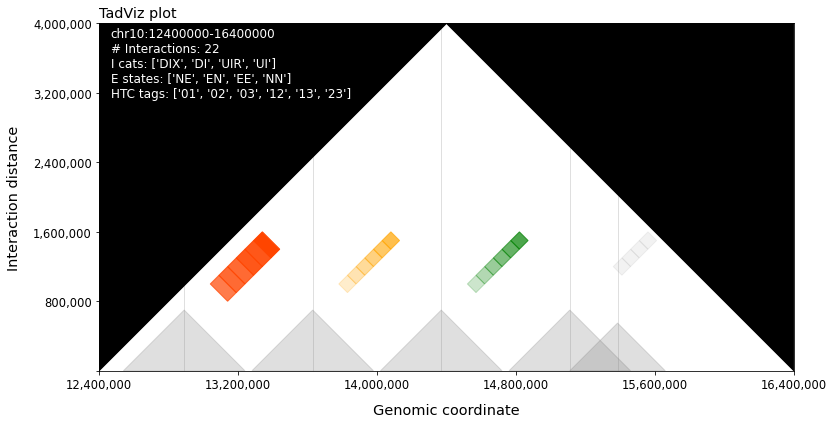

In [7]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end)

In priciple, this plot corresponds to a typical represenation of Hi-C interactions. The genomic coordinates are plotted on the x-axis and each colored tetragon in the triangle above represents an interaction between two genomic regions. For Hi-C data, interactions are typically grouped in bins of the same size, so that all tetragon are squares. In the representation presented here, the tetragons can also be rectangular. The edge lengths result from the length of the two digests associated with an interaction.

Interactions from different categories are shown in different colors (`DIX` in `orangered`, `DI` in `orange`, `UIR` in `green` and `UI` in `gray`). The transparency of the polygons depends on how many reads an interaction has relative to all other interactions to be displayed within the range for which a heatmap is generated. Before we create a heatmap, we determine the quantiles `0.1, 0.2, ..., 1.0` for the read counts of all interactions to be displayed. For a specific interaction, we then use the largest quantile that only includes read counts that are smaller than the read count of that interaction. For instance, if an interaction has a total read count that is greater than 68% of the read counts of all other interactions, then the interaction is rendered with a transparency of `0.6`. For this example, we have assigned the read pair numbers of interactions in a linearly decreasing manner. `DIX` interactions have between `21` and `30` read pairs per interaction, both `DI` and `UIR` interactions between `20` and `11` and `UI` interactions between `1` and `10`. Use `transparent_polygons=False` to render all polygons without transparency.

The TAD regions are shown as gray triangles that have a certain degree of transparency. In cases where TAD regions for different celltypes are loaded, TAD regions can also overlap. Due to the transparency, regions covered by multiple TADs appear as darker triangles. Digests that have been selected for enrichment (baited) are displayed as vertical gray lines at the center of the respective digests. Use `plot_bait_diagonals=True` to additionally highlight such digests with diagonal lines.

The interaction within the region to be visualized can be filtered. For instance, the folowing plot only contains `DI` and `UIR` interactions.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			12
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[15.1 16.  16.3 17.  17.5 18.  18.7 19.  19.9 20. ]
[INFO] ... done.


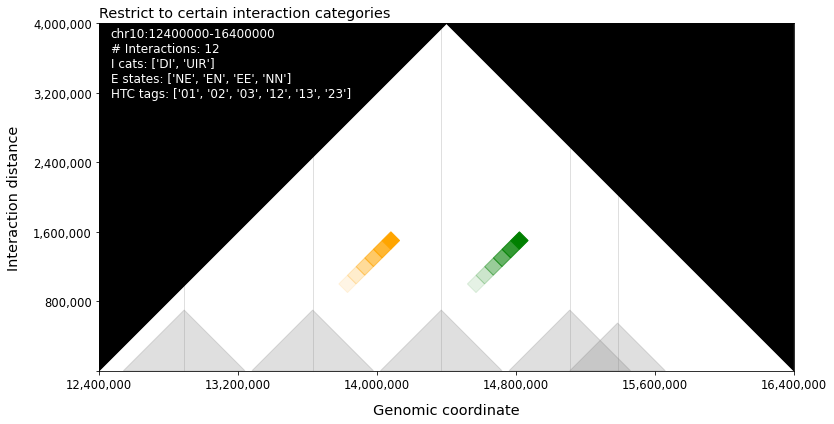

In [8]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    plot_title = 'Restrict to certain interaction categories')

Previously, the interactions are assigned colors according to their category. In the following plot, the interactions are colored according to their HTC tags. The colors are assigned as follows:
```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```
Use `color_i_cats = False` to color interactions according to their HTC tags.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			12
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[15.1 16.  16.3 17.  17.5 18.  18.7 19.  19.9 20. ]
[INFO] ... done.


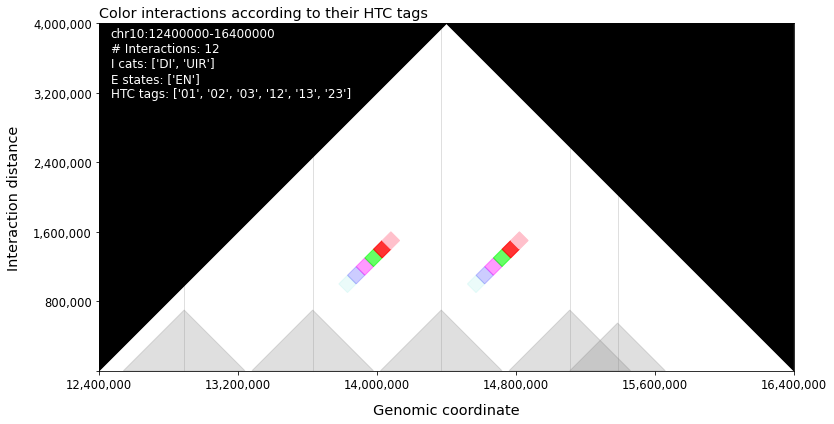

In [9]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    color_i_cats = False,
    plot_title = 'Color interactions according to their HTC tags')

The interaction can als be filtered based on their HTC tag. The following plot shows only interactions with the tags `01` (`pink`), `02` (`red`) and `03` (`lime`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


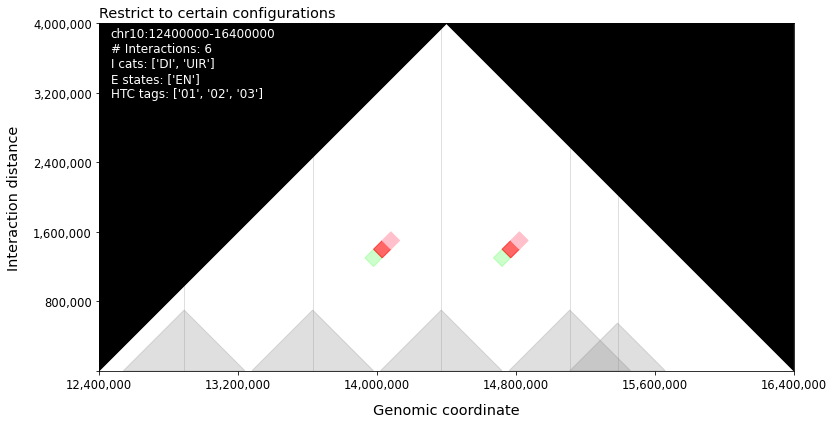

In [10]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_title = 'Restrict to certain configurations')

The baits, represented by vertical gray lines, can be additionally highlighted by diagonal lines using `plot_bait_diagonals=True`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


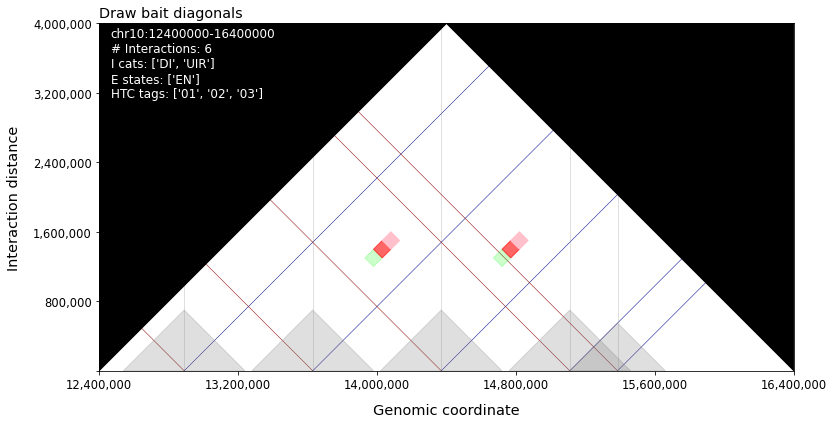

In [11]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_bait_diagonals=True,
    plot_title = 'Draw bait diagonals')

Per default, the method `PolygonPatch` automatically chooses a line width for the borders of polygons. By outlining the polygons, they become more visible, which is useful when larger regions are displayed. However, this also leads to overlapping polygons that distort the representation. The parameter `pp_linewidth` van be used to control the line width yourself. A line width of `0` esures that there are no overlaps.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			6
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[18.  18.  18.5 19.  19.  19.  19.5 20.  20.  20. ]
[INFO] ... done.


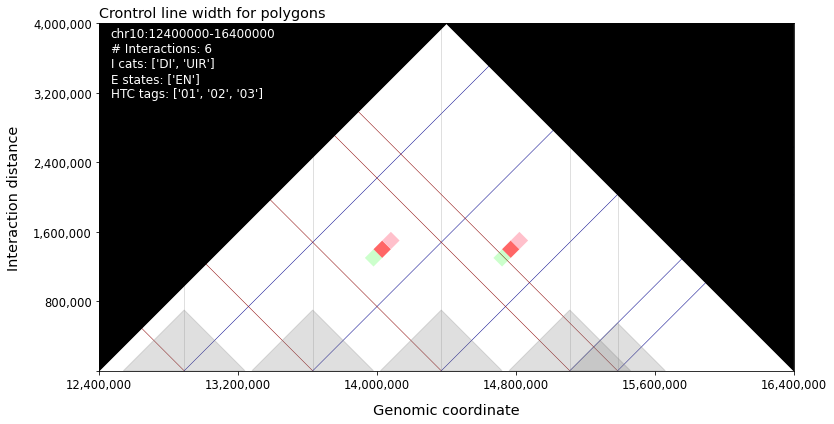

In [12]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                ht_tag_list = ['01','02','03'],
                                plot_bait_diagonals=True,
                                pp_linewidth=0,
                                plot_title = 'Crontrol line width for polygons')

## Visualization of capture Hi-C data

### Input data

There is capture Hi-C data for 17 cell types. We prepared interaction files with `DICer` and placed them in a local directory structure. If you do not have this directory structure, enter your path to an interaction file at the bottom of the the following cell.

In [13]:
#CELL_TYPE_SHORT = 'MK'            # Has HC data
#CELL_TYPE_SHORT = 'ERY'           # Has HC data
#CELL_TYPE_SHORT = 'NEU'           # Has HC data
#CELL_TYPE_SHORT = 'MON'           # Has HC data
CELL_TYPE_SHORT = 'MAC_M0'        # Has HC data
#CELL_TYPE_SHORT = 'MAC_M1'
#CELL_TYPE_SHORT = 'MAC_M2'
#CELL_TYPE_SHORT = 'EP'
#CELL_TYPE_SHORT = 'NB'            # Has HC data
#CELL_TYPE_SHORT = 'TB'
#CELL_TYPE_SHORT = 'FOET'
#CELL_TYPE_SHORT = 'NCD4'          # Has HC data
#CELL_TYPE_SHORT = 'TCD4'
#CELL_TYPE_SHORT = 'NACD4'
#CELL_TYPE_SHORT = 'ACD4'
#CELL_TYPE_SHORT = 'NCD8'          # Has HC data
#CELL_TYPE_SHORT = 'TCD8'

PROTOCOL = 'CHC'
MIN_I_DIST = '20000'
FDR = '05'
RPC_RULE = 'ht'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED':
    INTERACTION_FILE = '../DICer_interactions/HT/FDR0' + FDR + '/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + RPC_RULE.lower()
    
#INTERACTION_FILE = '<YOUR_PATH_TO_AN_INTERACTION_FILE>'

Load one of the eight BED files with the published TADs (Javierre et al. 2016) or a BED file with TADs from all eight cell types. If `None` is specified for the path, no TAD regions will be displayed.

In [26]:
#TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/hglft_genome_TADs_' + CELL_TYPE_SHORT + '_hg38.bed'
#TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/all_tad_regions.bed'
#TAD_BED_FILE = '../tests/data/highlighted_region_for_publiction.bed'
TAD_BED_FILE = None

Load the BED file with all regions of baited digests.

In [27]:
BAIT_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/additional_files/javierre_2016/baited_digest_regions_hg38/Digest_Human_HindIII_baits_e75_ID.baitmap.hg38.bed'

Create a `CHCTadViz` object.

In [28]:
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr2: 814,141 interactions
		chr3: 673,663 interactions
		chr6: 598,182 interactions
		chr9: 403,820 interactions
		chr12: 534,877 interactions
		chr10: 454,651 interactions
		chr7: 458,081 interactions
		chrX: 200,858 interactions
		chr4: 504,368 interactions
		chr1: 981,090 interactions
		chr11: 590,388 interactions
		chr18: 189,836 interactions
		chr5: 596,726 interactions
		chr16: 230,255 interactions
		chr8: 466,733 interactions
		chr14: 360,235 interactions
		chr19: 211,193 interactions
		chr15: 291,928 interactions
		chr20: 251,324 interactions
		chr13: 256,116 interactions
		chr22: 131,978 interactions
		chr17: 324,390 interactions
		chr21: 120,460 interactions
		chrY: 2,917 interactions
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr1: 2,272 Baits
		chr10: 941 Baits
		chr11: 1,400 Baits
		chr12: 1,199 Baits
		chr1

### Visualize HT configurations

If `color_i_cats=False`, then interactions are colored according to their HT configurations. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

#### Separat triangle heatmaps for the enrichment states `NE` and `EN`

We generate triangle heatmaps for the following region:

In [24]:
chrom = 'chr1'
begin = 23000000
end = 25000000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)

For the selcted region, we generate eight triangle heatmaps, one for each enrichment status (`NE` and `EN`) and interaction category (`DIX`, `DI`, `UIR` and `UI`).

Creating plot for: chr1:23000000-25000000
	e_cat: NE
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	e_cat: EN
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


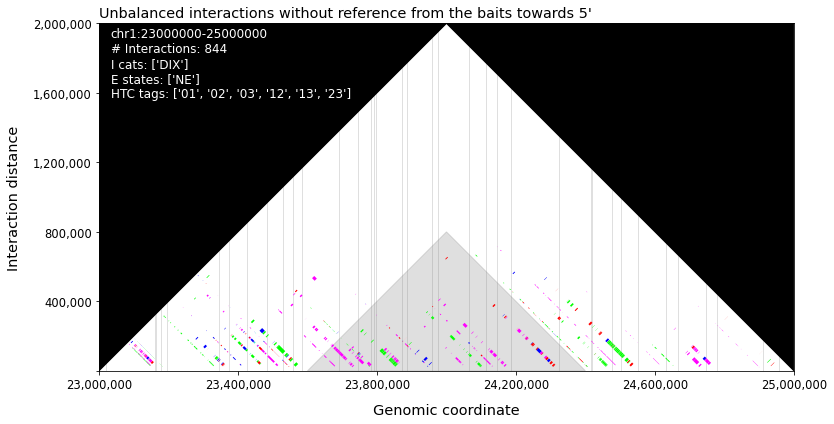

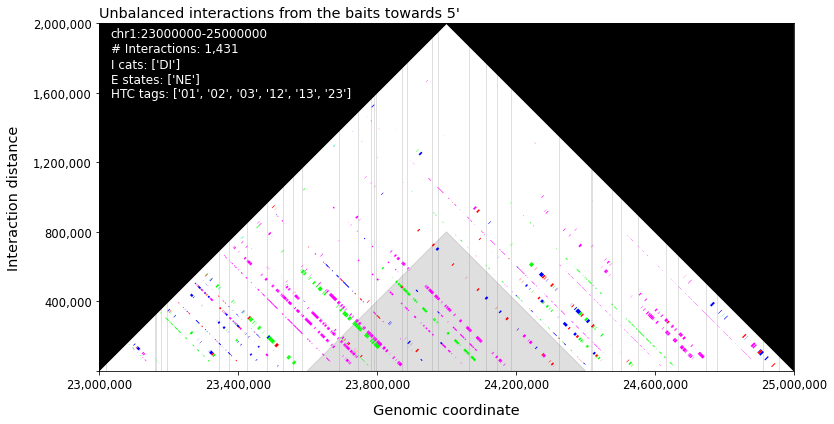

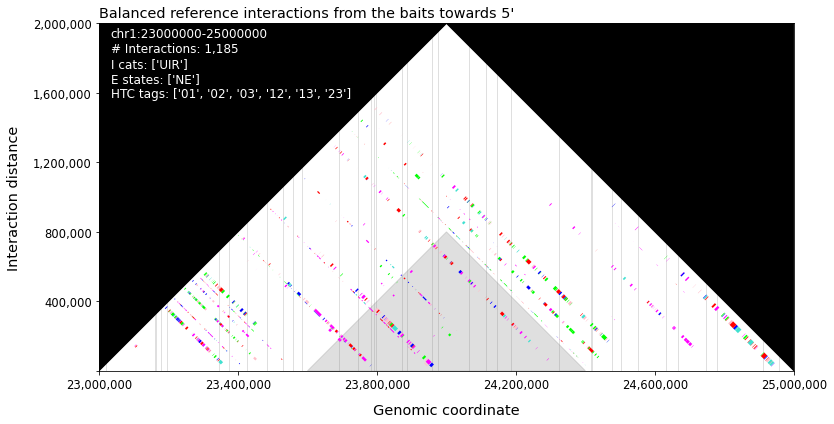

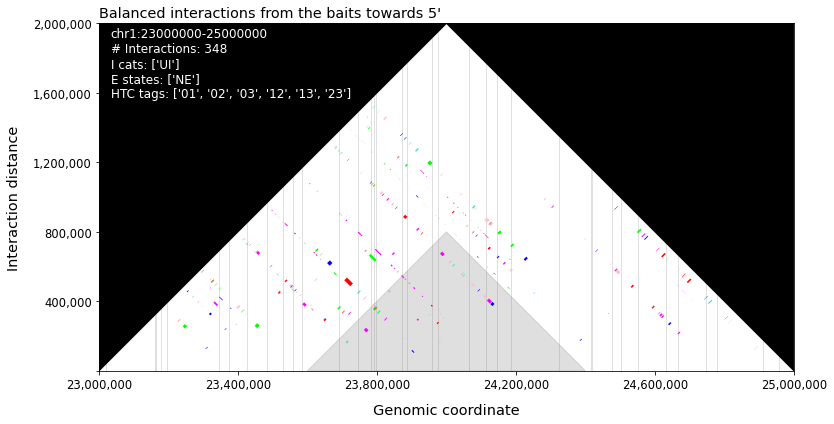

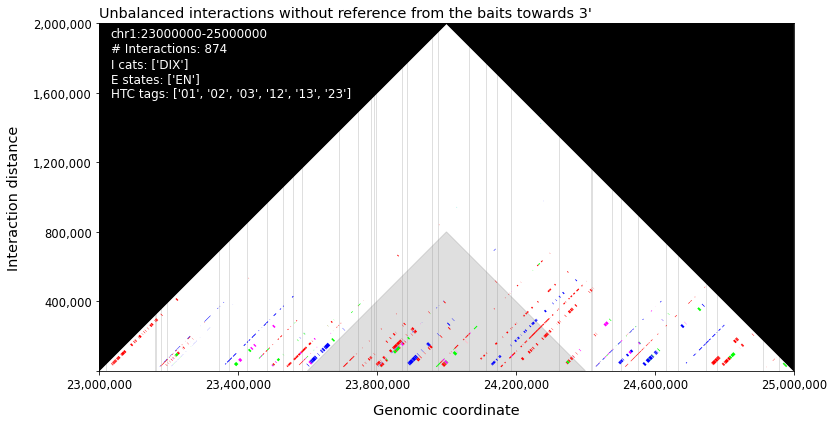

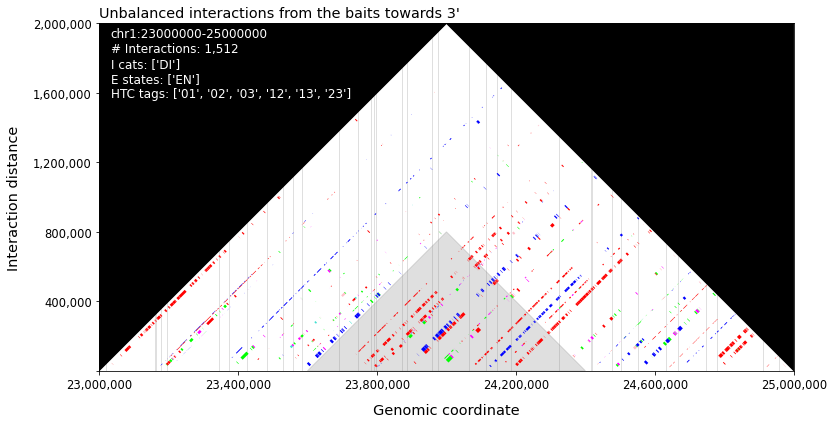

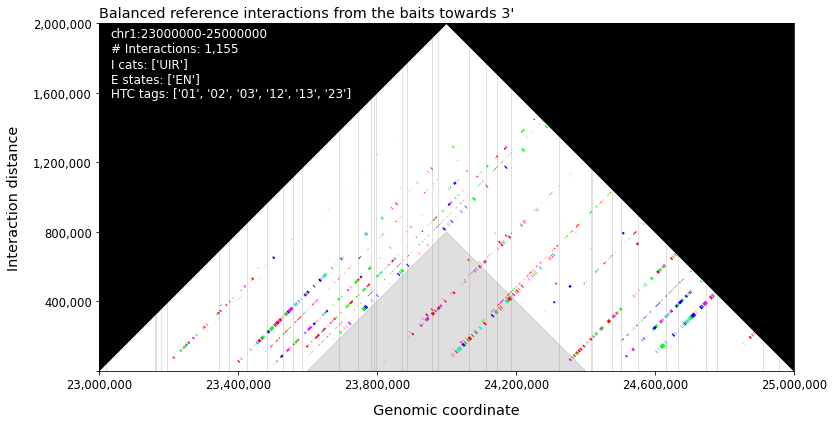

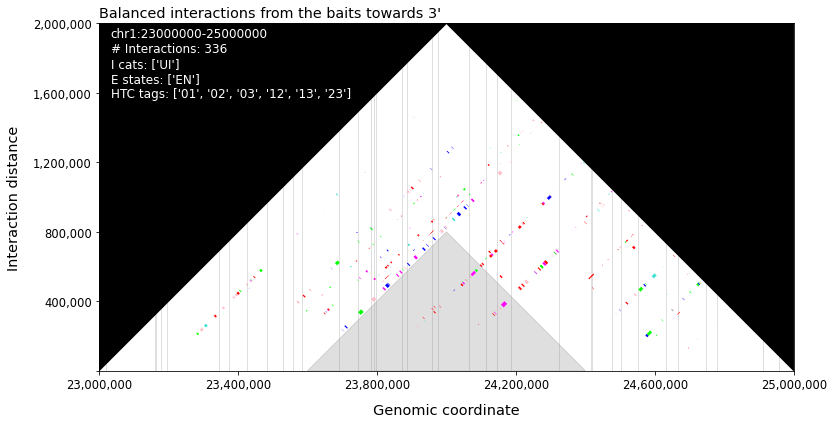

In [25]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits towards 5\''
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits towards 3\''
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        pp_linewidth=0,
                                        transparent_polygons=False,           
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + i_cat + '.pdf',
                                        verbose=False)

#### Triangle heatmap for a few baited digests and not separated for `NE` and `EN`.

In [34]:
chrom = 'chr1'
begin = 23600000
end = 24400000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)

Creating plot for: chr1:23600000-24400000
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


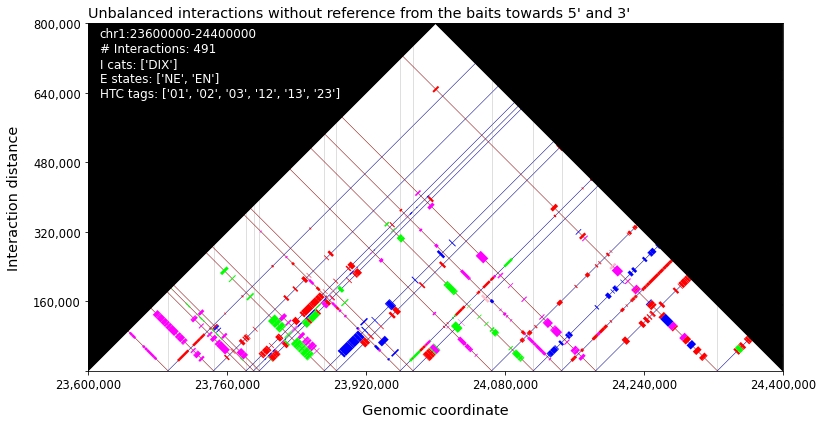

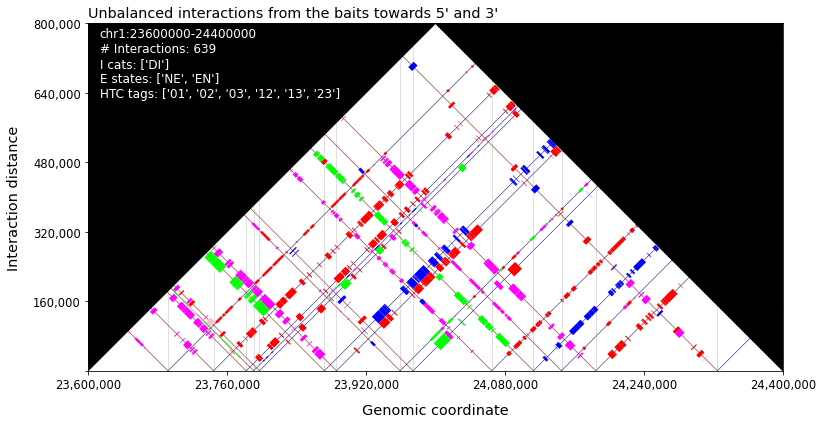

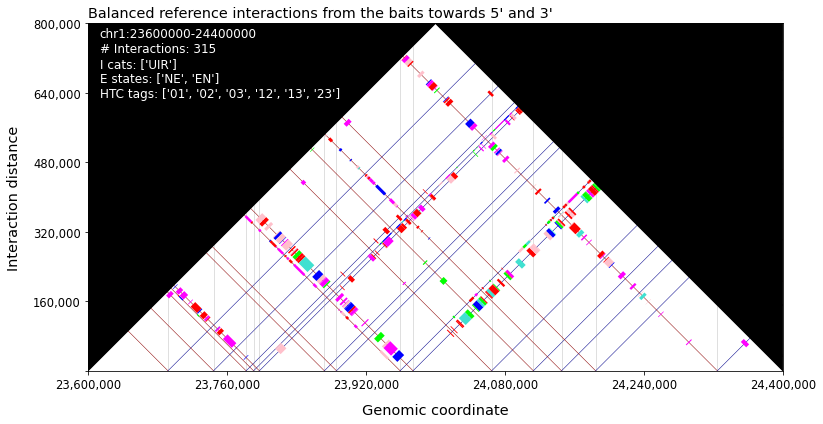

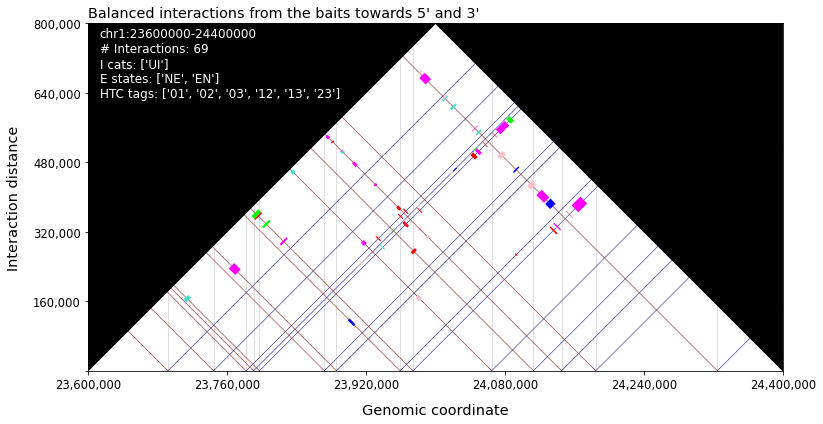

In [35]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
    print("\t\ti_cat: " + i_cat)
    if i_cat == 'DIX':
        plot_title = 'Unbalanced interactions without reference'
    if i_cat == 'DI':
        plot_title = 'Unbalanced interactions'
    if i_cat == 'UIR':
        plot_title = 'Balanced reference interactions'
    if i_cat == 'UI':
        plot_title = 'Balanced interactions'
    plot_title = plot_title + ' from the baits towards 5\' and 3\''
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = [i_cat],
                                    enr_cat_list = ['NE','EN'],
                                    color_i_cats=False,
                                    pp_linewidth=0,
                                    plot_bait_diagonals=True,
                                    transparent_polygons=False,           
                                    plot_title = plot_title,
                                    pdf_file_name = pdf_file_name_prefix + '_' + i_cat + '.pdf',
                                    verbose=False)
        
#TadViz_plot = visualizer.create_visualization(chrom = chrom,
#                                begin = begin,
#                                end = end,
#                                inter_cat_list = [i_cat],
#                                enr_cat_list = ['NE','EN'],
#                                color_i_cats=False,
#                                pp_linewidth=0,
#                                plot_bait_diagonals=True,
#                                transparent_polygons=False,
#                                plot_title = plot_title,
#                                pdf_file_name = pdf_file_name_prefix + '_' + i_cat + '.pdf',
#                                verbose=False)

### Compare interaction categories

First we show all interaction categories in one plot. But we restrict to interactions in which only one of the two digests was selected for enrichment (`NE` or `EN`). For the capture Hi-C datasets shown here, these interactions account for more than 90% of all interactions.

In [15]:
chrom = 'chr10'
begin = 13000000
end = begin + 2500000
d_radius = 10000

In [16]:
chrom = 'chr11'
begin = 75715230 - 1000000
end = 75715230 + 1000000
d_radius = 10000

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 9,008 interactions in range:
		chr11:74715230-76715230
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			6,586
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[   7.     9.    12.    15.    19.    24.    33.    49.    89.5 1280. ]
[INFO] ... done.


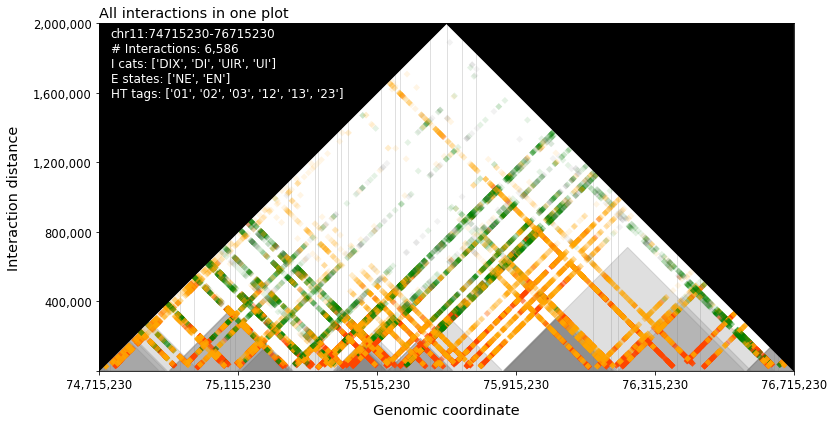

In [16]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DIX', 'DI', 'UIR', 'UI'],
                                enr_cat_list = ['NE','EN'],
                                d_radius = d_radius,
                                plot_title = 'All interactions in one plot')

Creating plots for: chr2:43000000-44000000
Creating plots for: chr2:43500000-44500000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:44000000-45000000
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plots for: chr2:44500000-45500000
[ERROR] After filtering, there are no interactions left to be visualized!


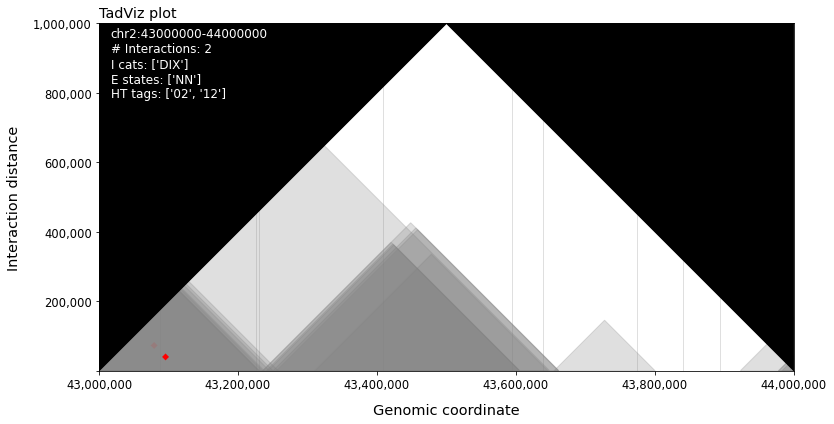

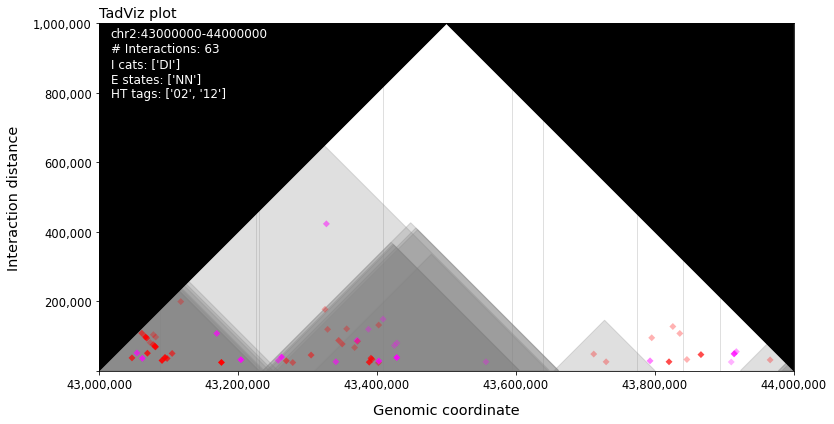

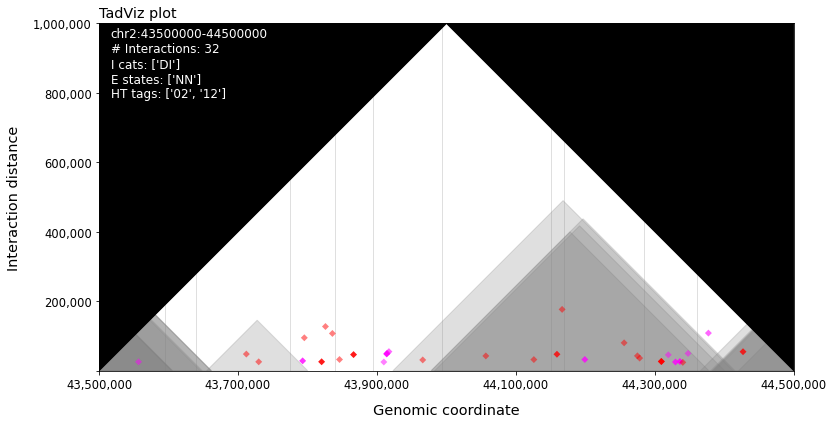

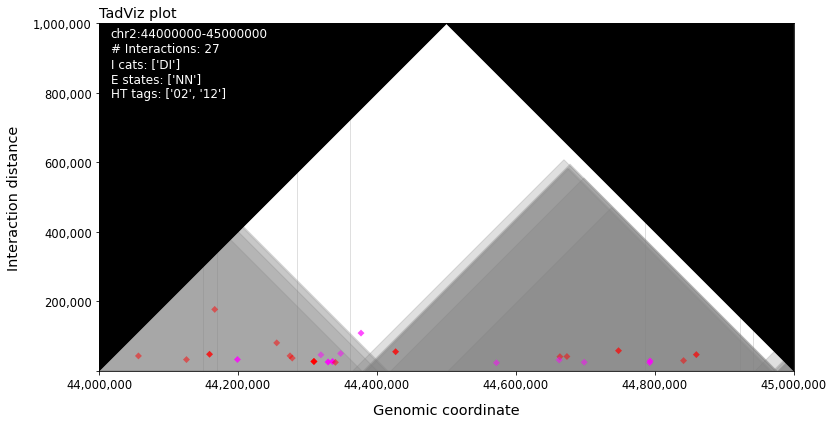

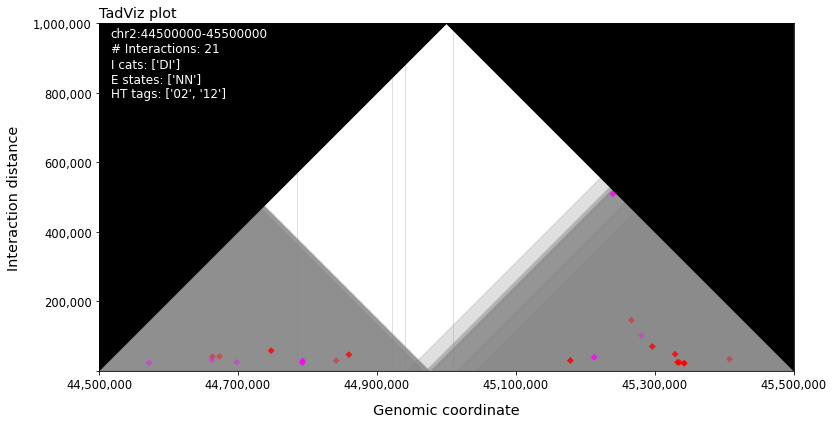

In [17]:
chrom = 'chr2'
from_pos = 43000000
to_pos = from_pos + 2000000
window_size = 1000000
shift_size = int(window_size/2)
d_radius = 5000
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DIX'],
                                    enr_cat_list = ['NN'],
                                    d_radius = d_radius,
                                    color_i_cats = False,
                                    verbose=False,
                                    ht_tag_list = ['02','12'])
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI'],
                                    enr_cat_list = ['NN'],
                                    d_radius = d_radius,
                                    color_i_cats = False,
                                    verbose=False,
                                    ht_tag_list = ['02','12'])

This plot shows capture Hi-C interactions between `HindIII` restriction fragments. Because restriction fragments are of different lengths, the tetragons are rectangular. The data was not corrected for distance-dependent interaction frequencies, so that the interactions spread out from the baits to the left and right. The four interaction categories `DIX` (orangered), `DI` (orange), `UIR` (green) and `UI` (gray) are shown in different colors. Note that the `UI` interactions can hardely be recognized because they have the lowest read pair counts of the the interactions shown. The TAD regions are shown as transparent triangles in the background. In this case, we have loaded the file with the TAD regions from all eight cell types, so that a genomic region can be covered by several TADs. Due to the transparent display of TADs, the gray triangles over such regions are darker.

Alternatively, create one plot separately for each interaction category.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 1,521 interactions in range:
		chr2:44500000-45500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX']
		[INFO] Enrichment status:
			['NE']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			138
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 28.7  33.4  42.   51.6  70.5  85.4 104.7 153.  239.5 621. ]
[INFO] ... done.
[INFO] Creating visualization ...
	[INFO] Extracted a total number of 1,521 interactions in range:
		chr2:44500000-45500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			143
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1

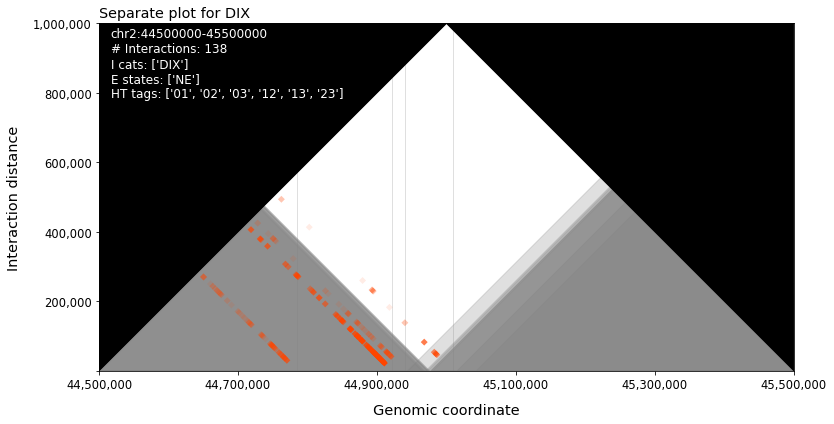

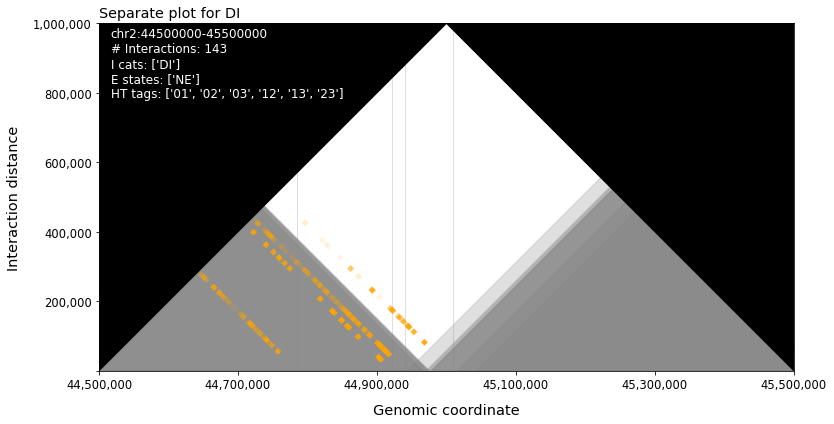

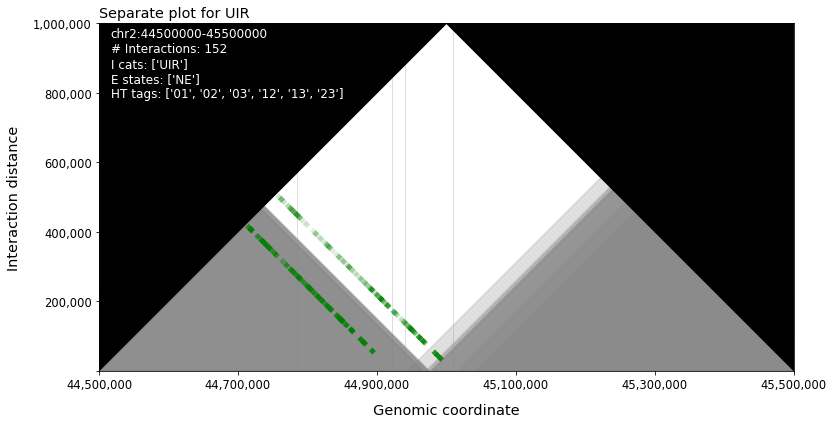

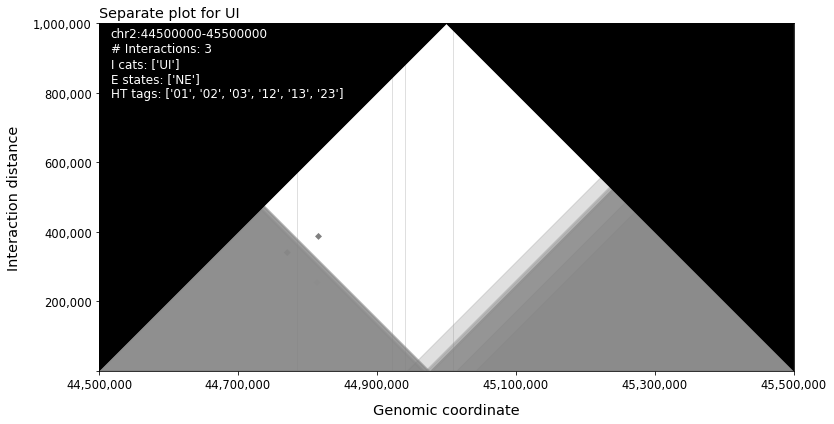

In [18]:
for i_cat in ['DIX','DI','UIR','UI']:
    TadViz_plot = visualizer.create_visualization(
                                    chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = [i_cat],
                                    enr_cat_list = ['NE'],
                                    d_radius = d_radius,
                                    plot_title = 'Separate plot for ' + i_cat)

`DI` and `UIR` are comparable -> Show in one plot

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 1,521 interactions in range:
		chr2:44500000-45500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			768
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 10.   13.   19.   24.8  32.5  42.   52.9  70.6  95.  487. ]
[INFO] ... done.


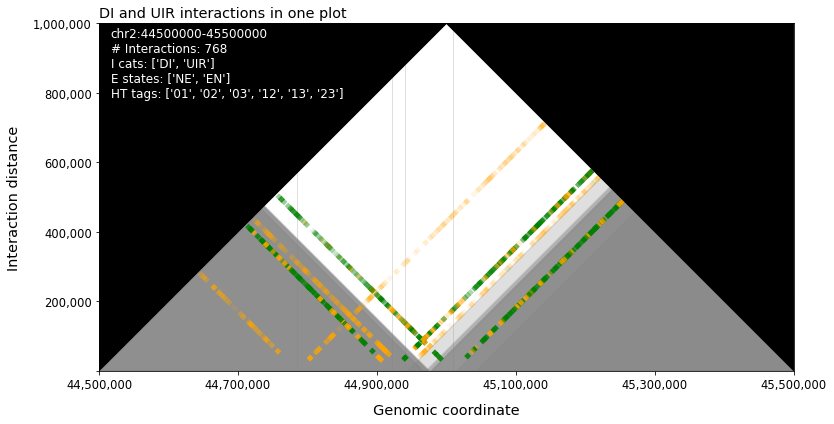

In [19]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI', 'UIR'],
                                enr_cat_list = ['NE','EN'],
                                d_radius = d_radius,
                                plot_title = 'DI and UIR interactions in one plot')

#### Slide a window along the genome

So far, we have only looked at one region. The following codes moves a window of width `2,000,000` bp along the genome and generates a plot for each window position. We restrict to the interaction categories `DI` and `UIR` and the enrichment state `EN`.

Creating plots for: chr2:110000000-112000000
Creating plots for: chr2:111000000-113000000
Creating plots for: chr2:112000000-114000000
Creating plots for: chr2:113000000-115000000
Creating plots for: chr2:114000000-116000000


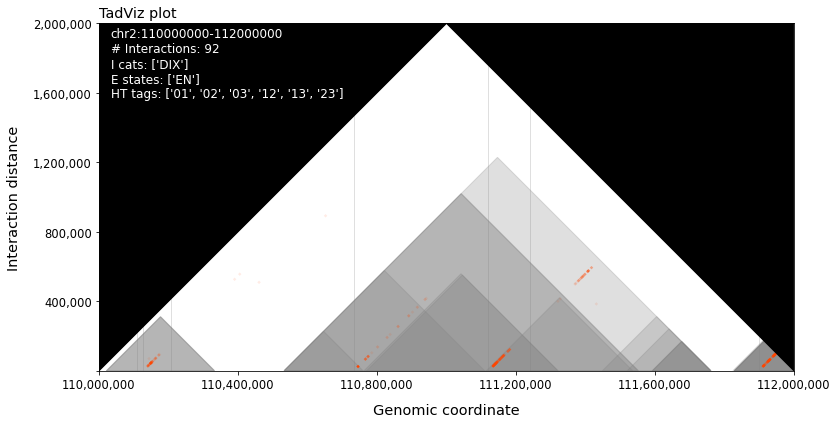

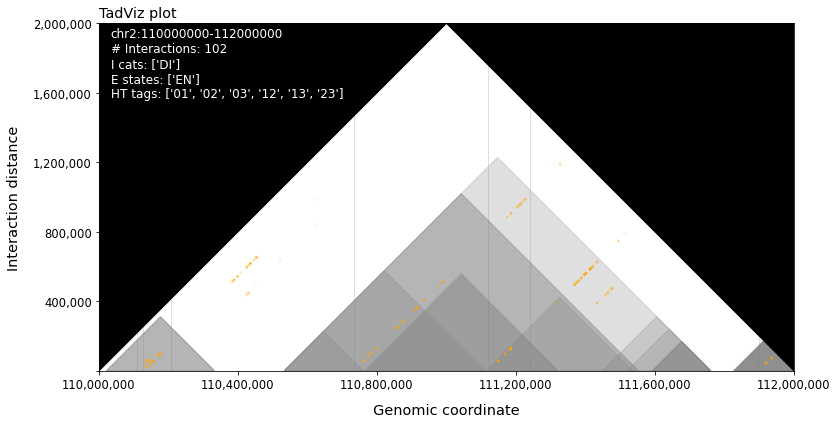

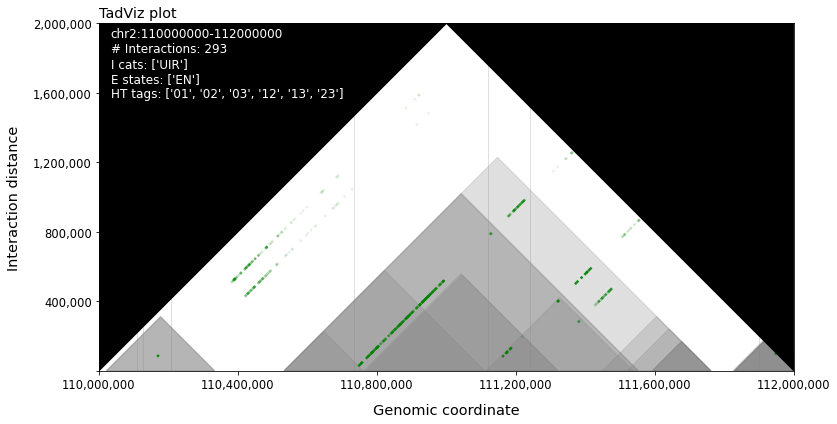

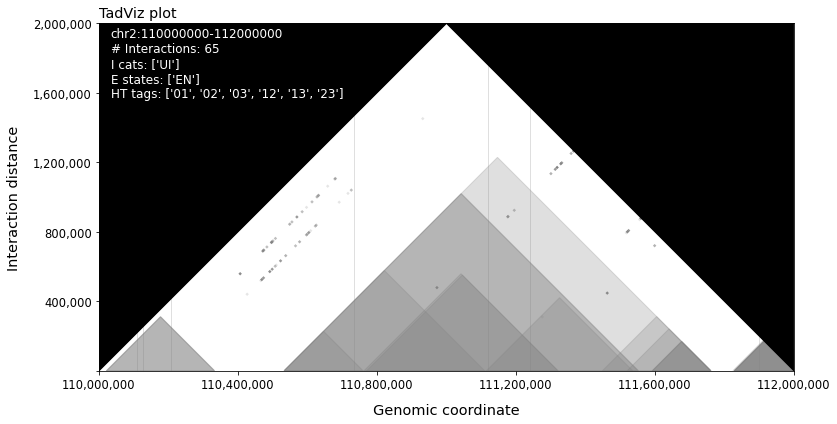

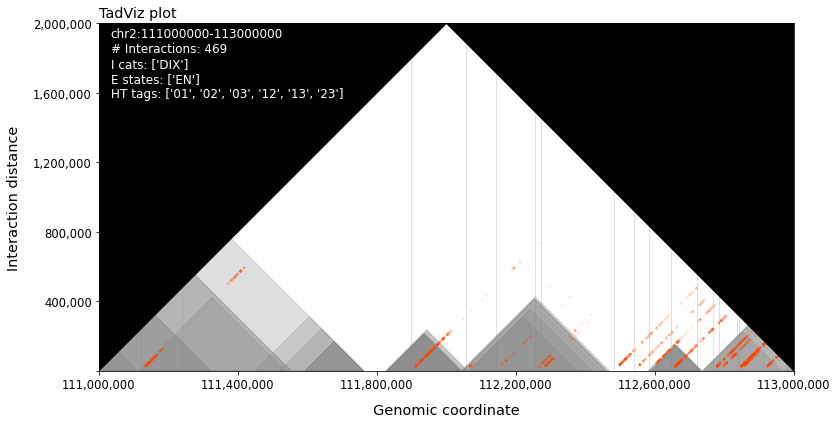

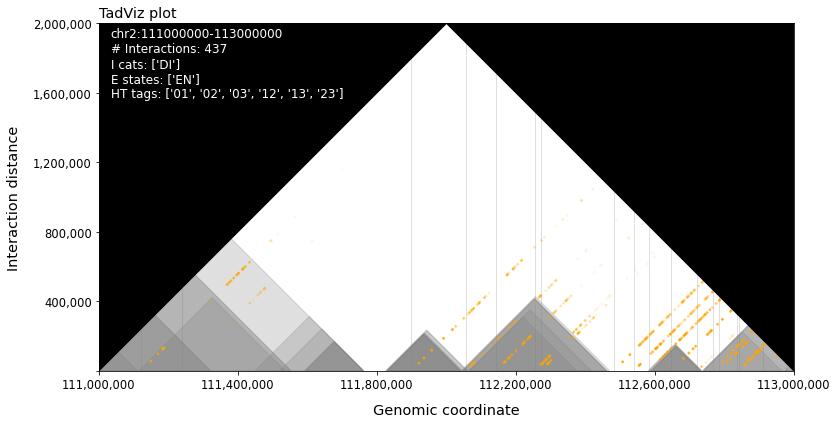

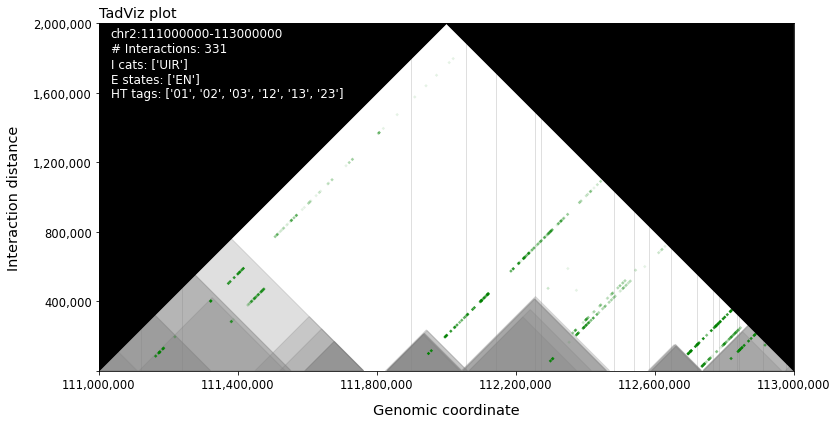

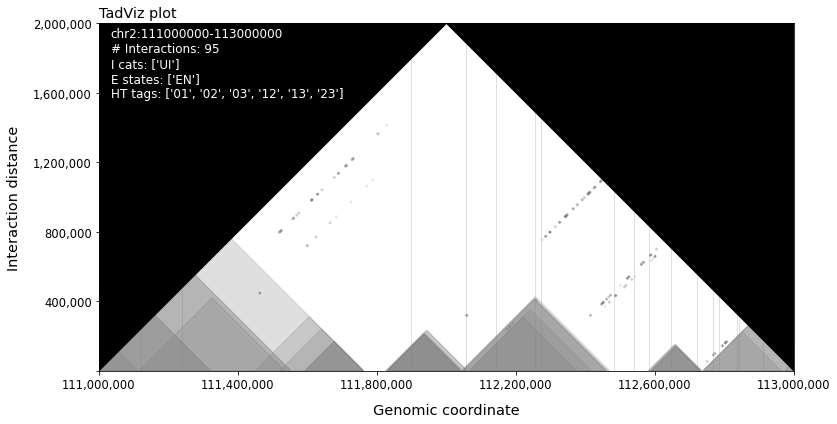

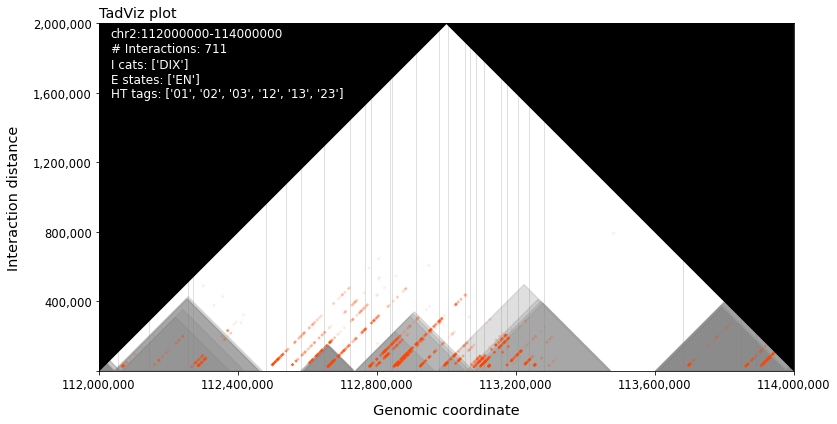

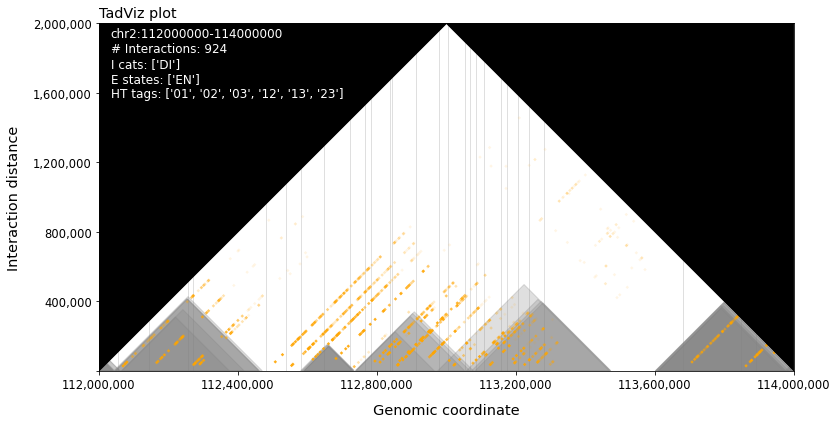

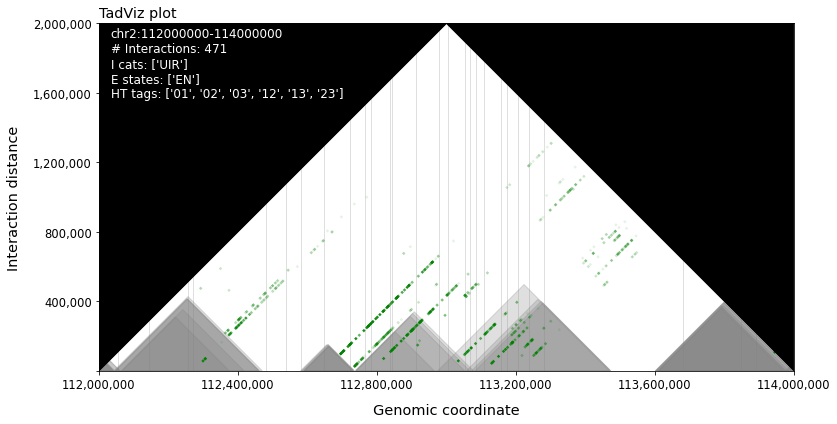

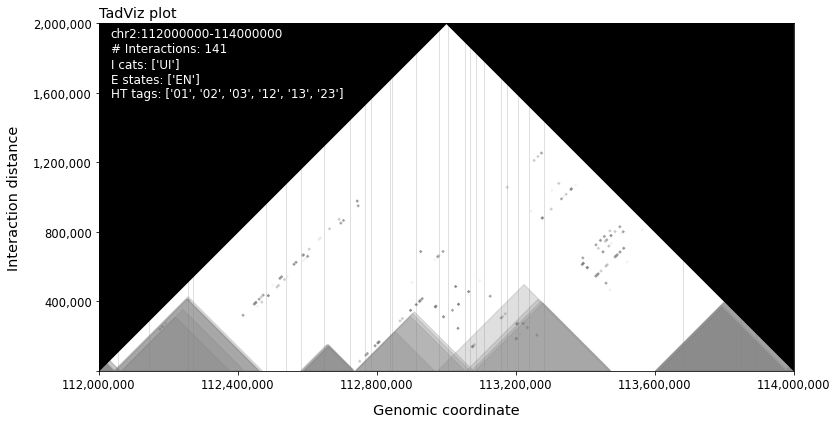

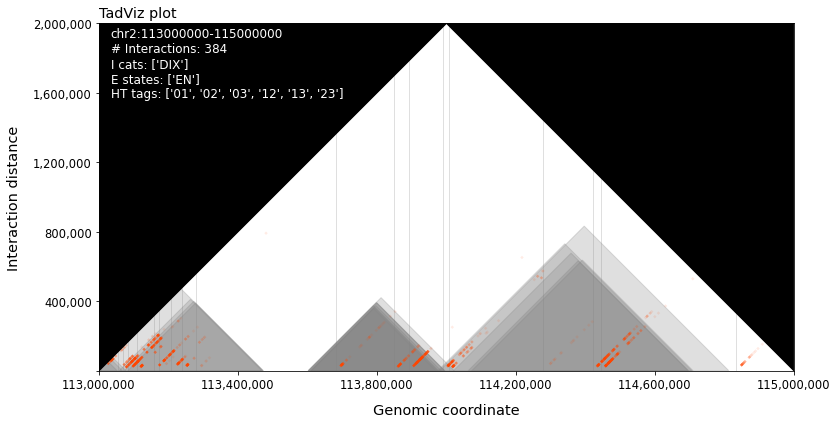

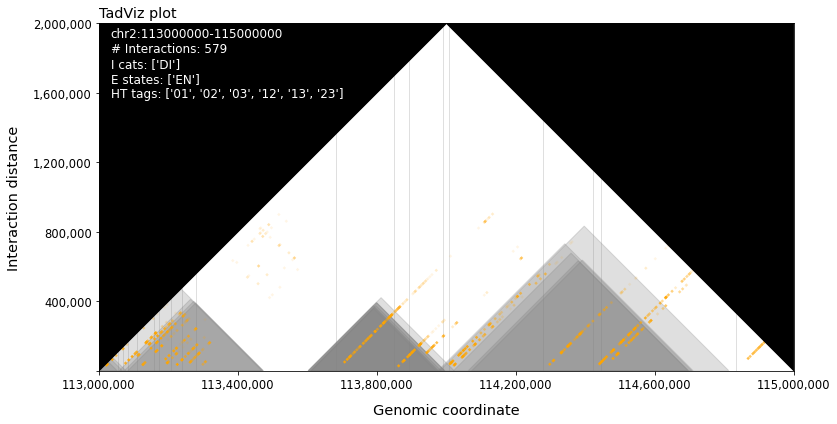

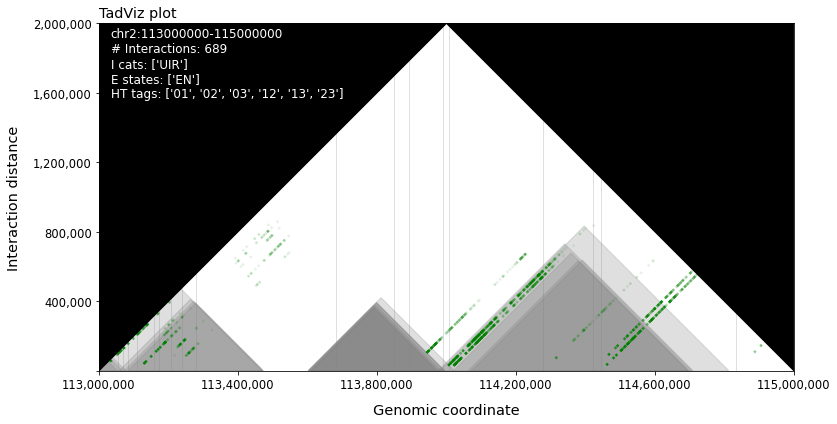

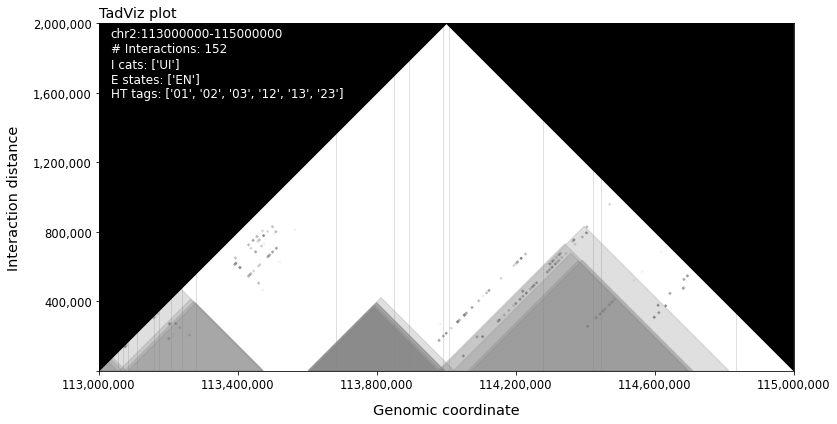

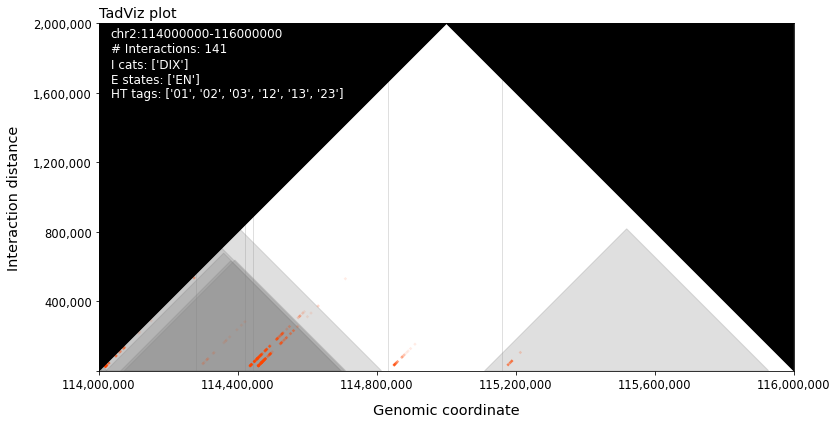

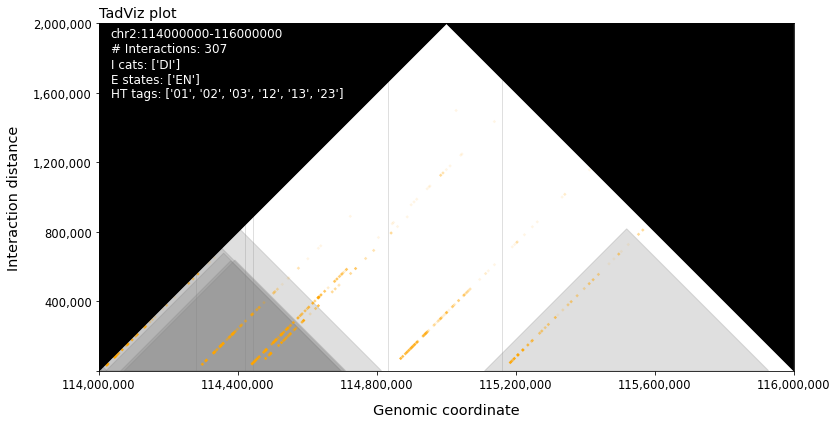

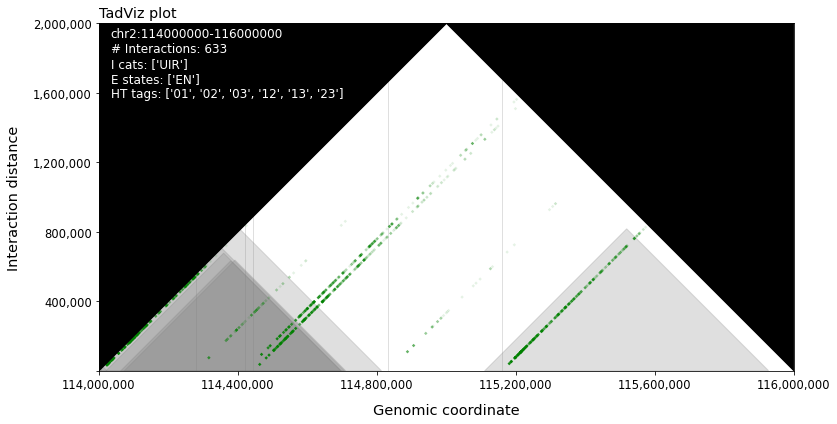

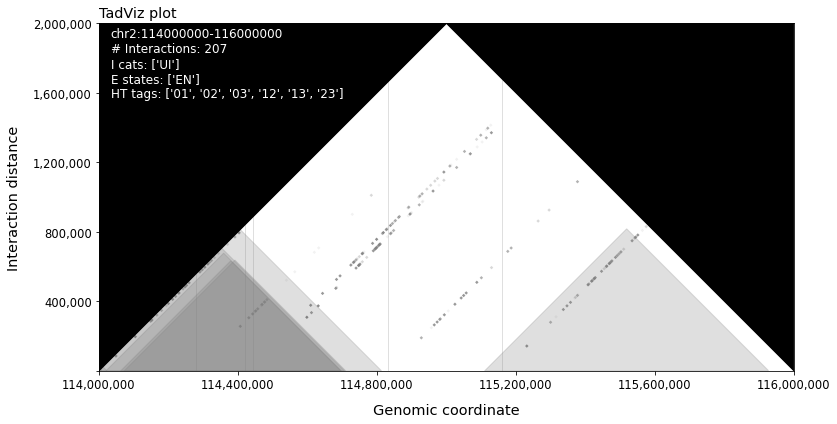

In [20]:
enr_cats = ['EN']
chrom = 'chr2'
from_pos = 110000000
to_pos = from_pos + 5000000
window_size = 2000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DIX'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['UIR'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['UI'],
                                    enr_cat_list = enr_cats,
                                    d_radius = d_radius,
                                    verbose=False)

### Compare HT configurations

If `color_i_cats=False`, then the interaction are colored according to their HT tags. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

We had already seen that unbalanced interactions with the HT tags `03` and `12` go more often from the bait to the left (`NE`), whereas interactions with the tags `02` and `13` go more often from the bait to the right (`EN`). For balanced interaction. For balanced interactions, we did not make this observation.

```
DI
['02', '13'] -> red, blue ->  -> from the baits to the left (EN)
['03', '12'] -> lime, magenta -> from the baits to the right (NE)
UIR
['02', '13'] -> red, blue ->  -> from the baits to the left (NE) and right (EN)
['03', '12'] -> lime, magenta -> from the baits to the left (NE) and right (EN)

```

Now we want to check whether this observation is also reflected in the TadViz-Plots. For this purpose, we did two analyzes:

1. For each inteaction category, plot `NE` and `EN` interactions separately. If the HT tags `02` (red) and `13` (blue) predominate for `EN` interactions and the HT tags `03` (lime) and `12` (magenta) predominate for `NE` interactions, then the previous obervation is reflected in the TadViz plots.
2. For the second analysis, we go the opposite way. For each interaction category, we plot both `NE` and `EN` interactions, but either only interactions with the HT tags `03` (lime) and `12` (magenta) or only interactions with the HT tags `02` (red) and `13` (blue). If the `NE` interactions predominate in the interactions with the HT tags `03` (lime) and `12` (magenta) and the `EN` interactions in the iteractions with the HT tags `02` (red) and `13` (blue), then the previous observation is also reflected in the TadViz plots.

#### For each inteaction category, plot `NE` and `EN` interactions separately (1)

Create two times eight PDFs for one region.

In [19]:
chrom = 'chr1'
begin = 23000000
end = 25000000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)
d_radius = 0
#begin = 24000000
#end = 24200000
#### BALANCED BAITED DIGESTS
#center_pos = 26993459
#chrom = 'chr1'
#begin = center_pos - 500000
#end = center_pos + 500000

Creating plot for: chr1:23000000-25000000
	e_cat: NE
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	e_cat: EN
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


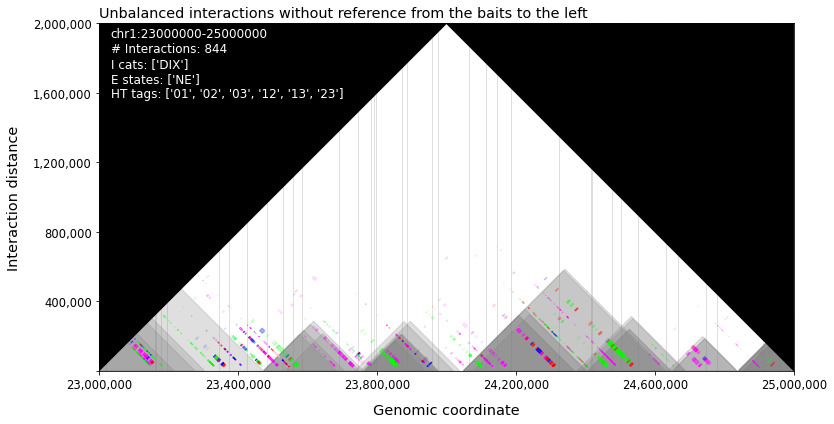

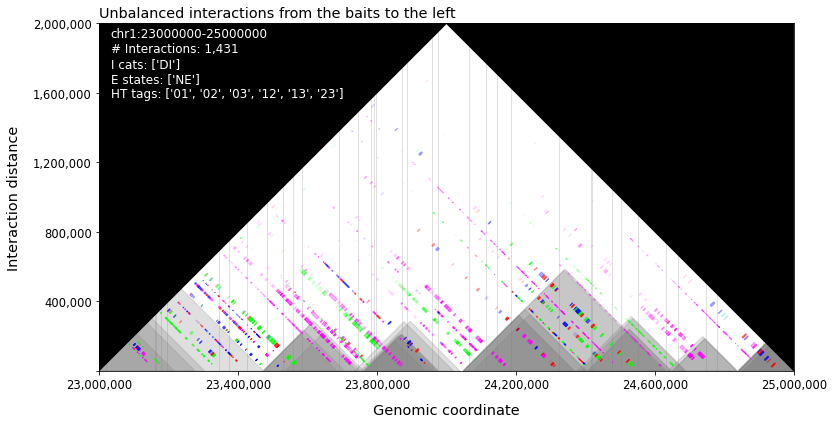

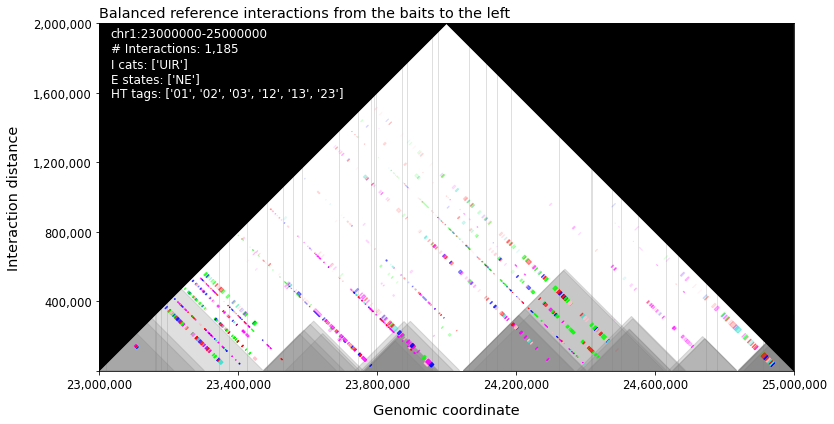

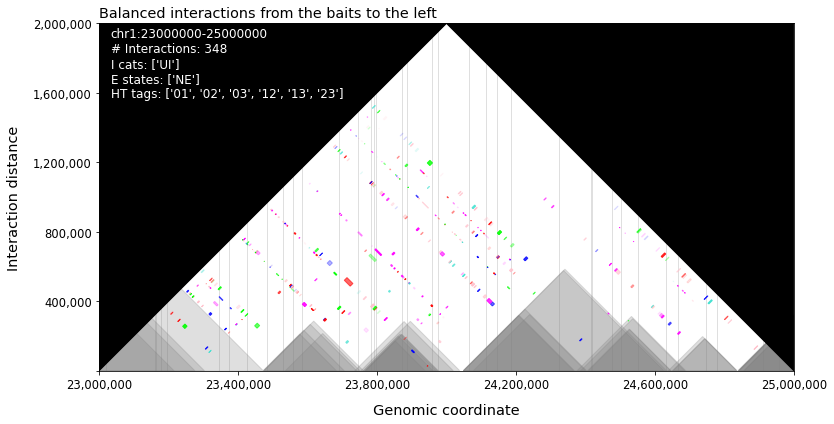

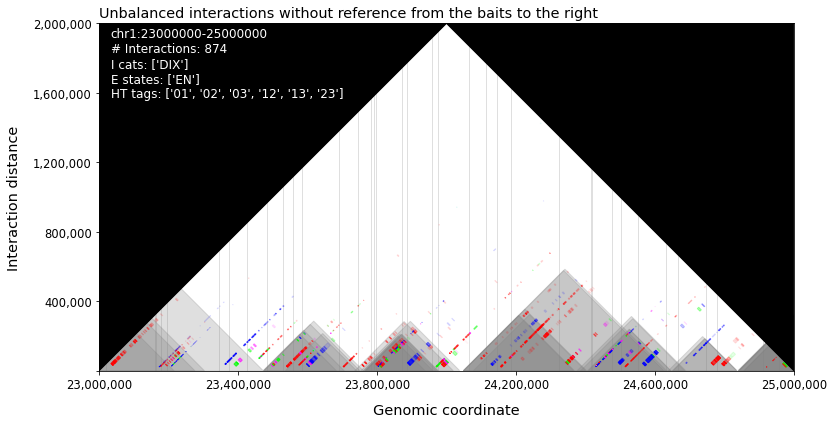

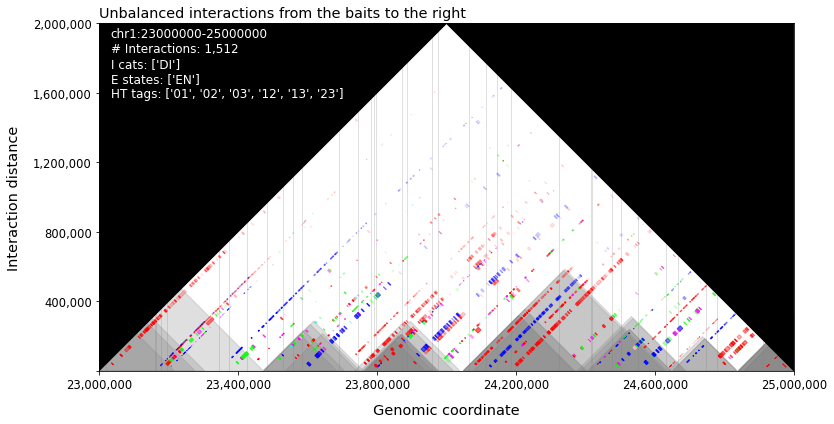

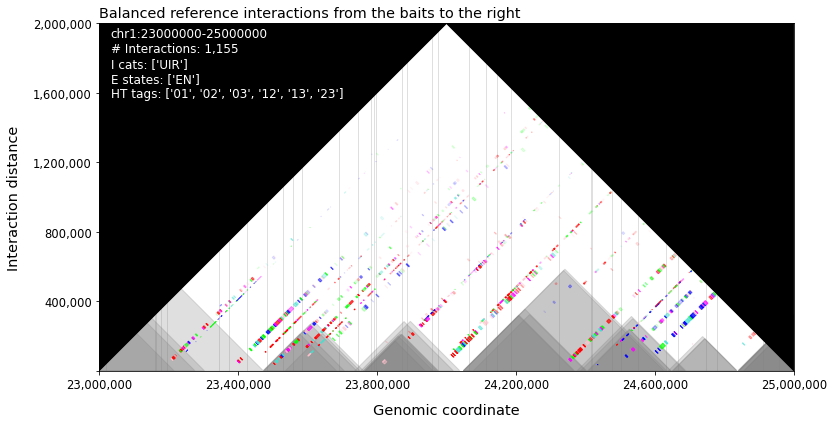

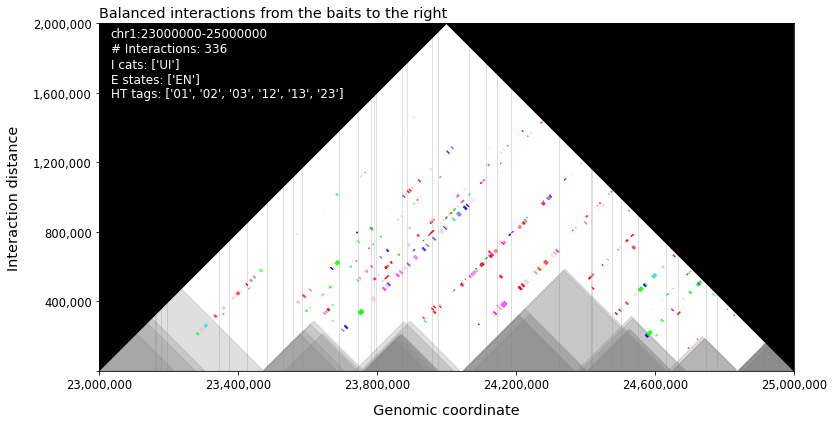

In [20]:
print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits to the left'
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits to the right'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        d_radius = d_radius,
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + i_cat + '.pdf',
                                        verbose=False)

#### For each inteaction category, plot `NE` and `EN` interactions but separately for the configurations `('02', '13')`  and `('12', '03')`  (2)

Create two times eight PDFs for one region.

Creating plots for: chr1:23000000-25000000
	ht_tags: ['02', '13']
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	ht_tags: ['12', '03']
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


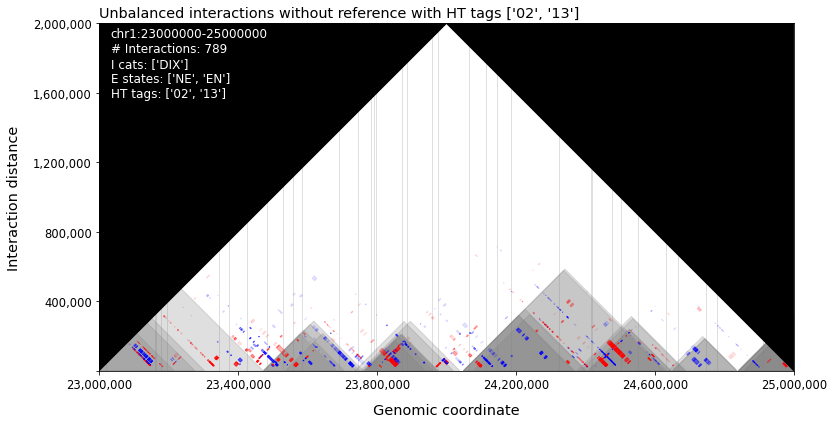

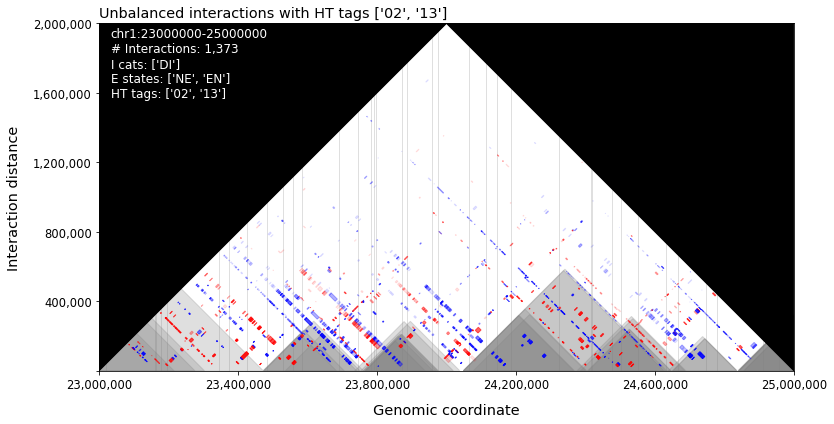

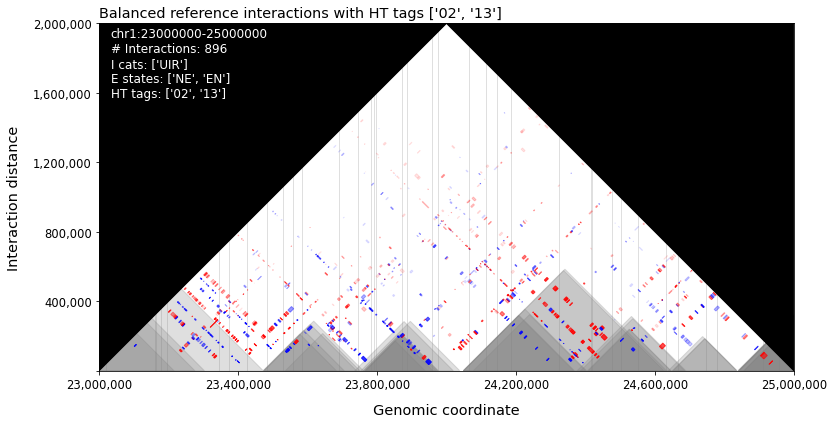

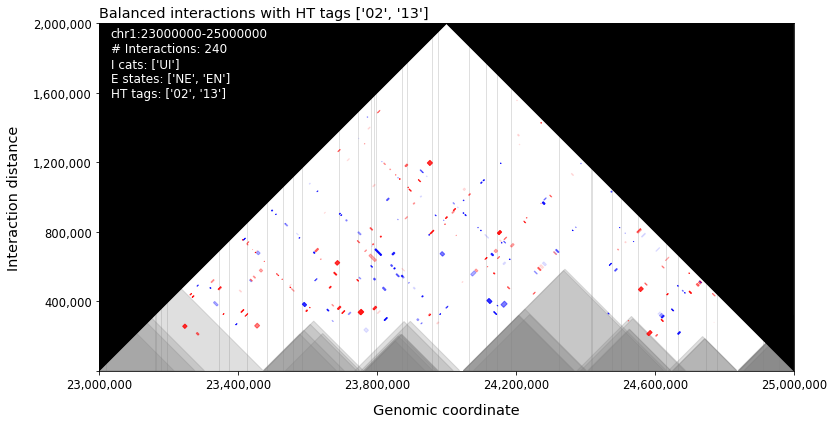

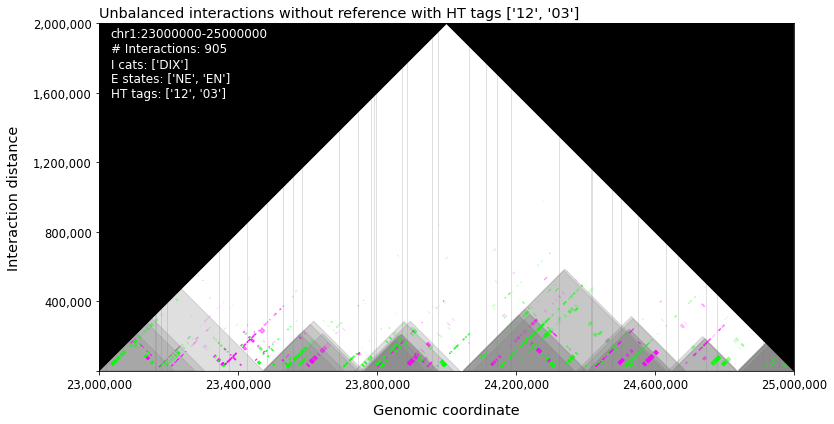

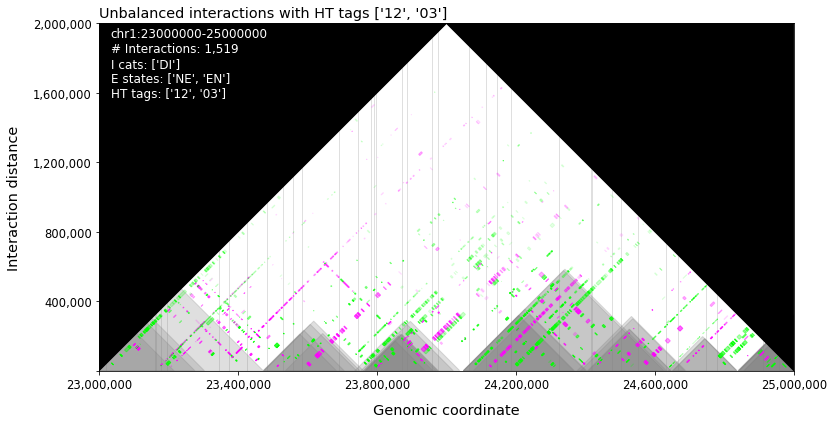

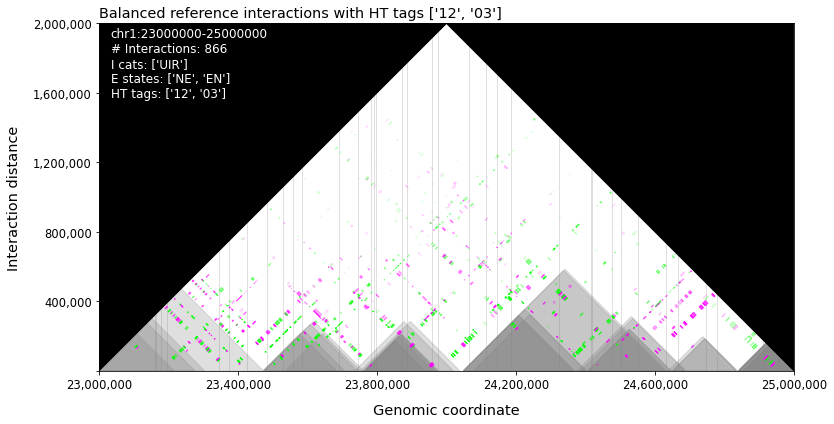

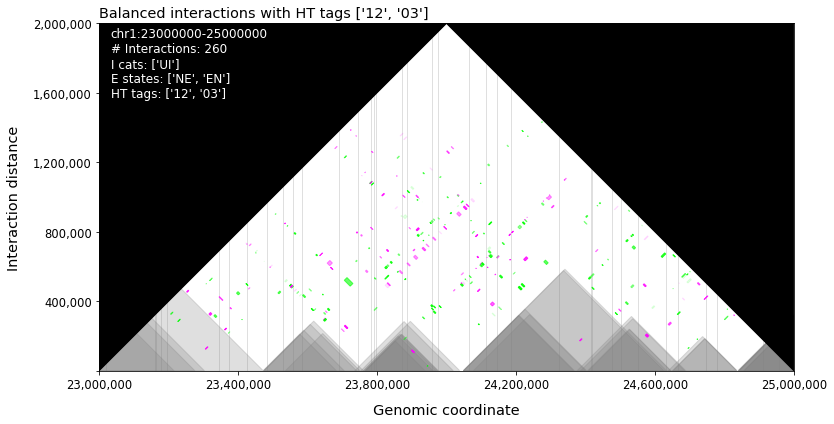

In [16]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for ht_tag_list in [['02', '13'], ['12', '03']]:
    print("\tht_tags: " + str(ht_tag_list))
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = ['NE','EN'], # enr_cat_list = ['NE'],
                                        ht_tag_list = ht_tag_list,
                                        color_i_cats = False,
                                        d_radius = d_radius,
                                        plot_title = plot_title + ' with HT tags ' + str(ht_tag_list), 
                                        pdf_file_name = pdf_file_name_prefix + '_' + str(ht_tag_list) + '_' + i_cat + '.pdf',
                                        verbose=False)

#### Slide a window along the genome

Open BED file with baited digests in UCSC genome browser and find regions with high density of baits.

```
chr1:22500000-27500000
chr10:68750000-71250000
chr2:8750000-11250000
chr2:10000000-12500000
chr2:10000000-12000000
chr2:25000000-27000000
```

Creating plot for: chr1:168000000-170000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:169000000-171000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:170000000-172000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['12', '03']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:171000000-173000000
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left t

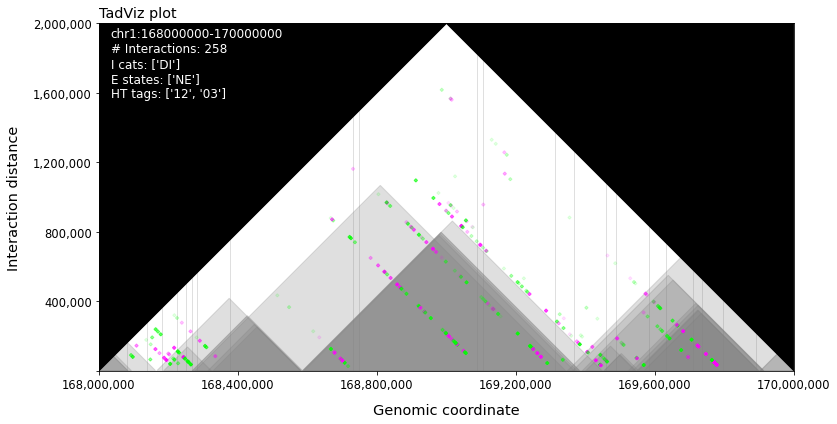

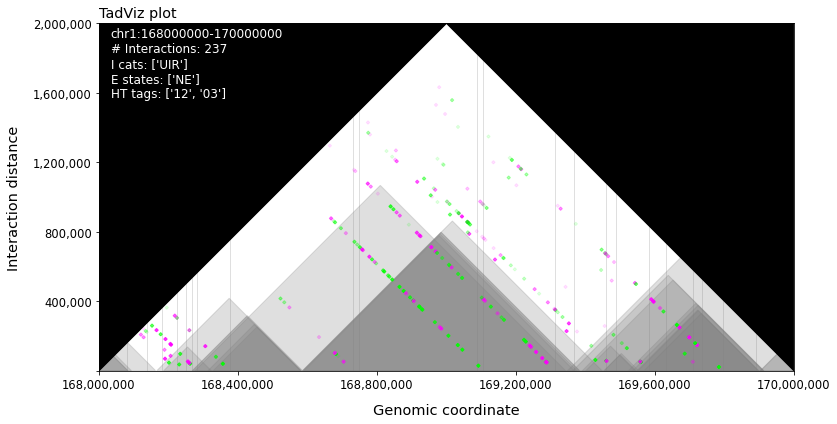

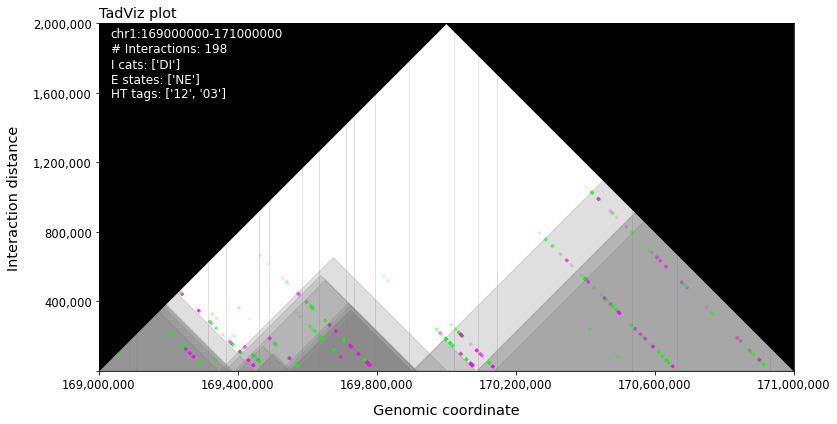

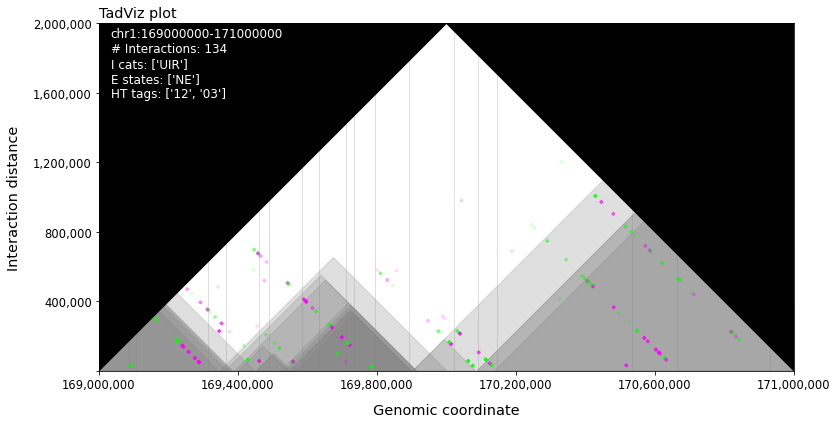

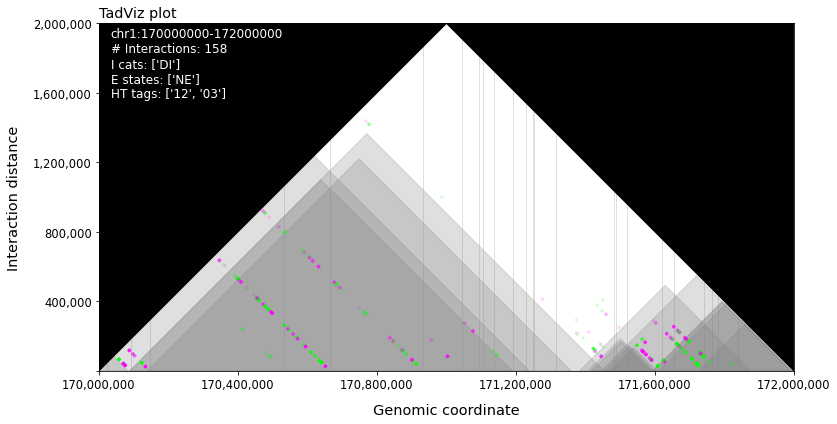

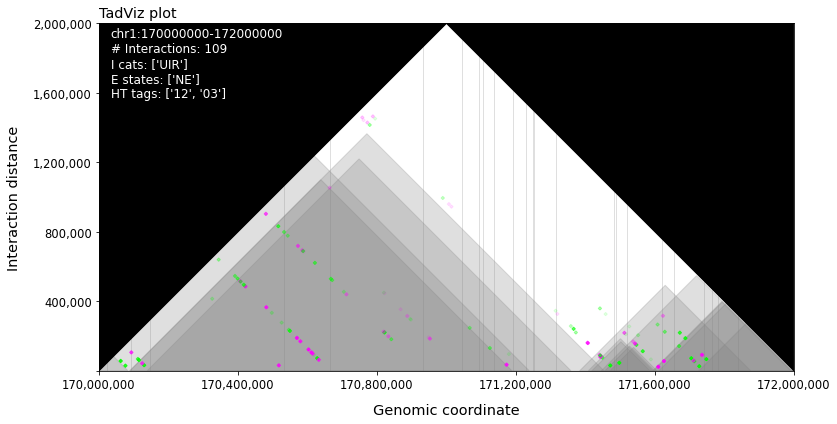

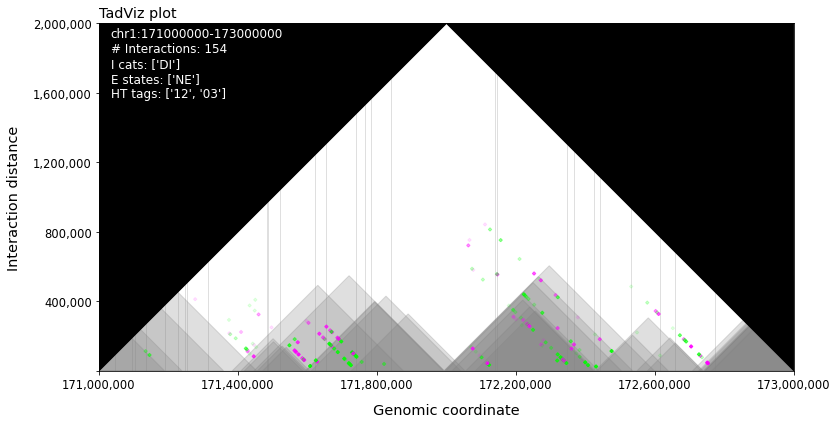

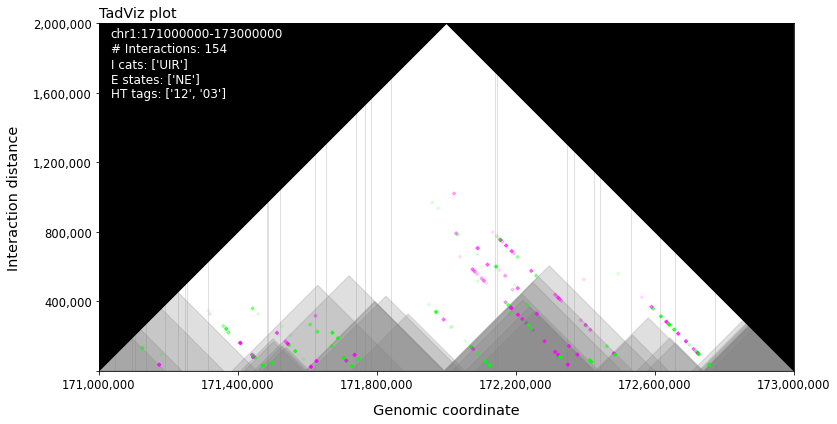

In [16]:
#chr1:154,795,996-157,036,109
chrom = 'chr1'
from_pos = 168000000
to_pos = from_pos + 4000000
window_size = 2000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    for ht_tag_list in [['02', '13'], ['12', '03']]:
        print("\tht_tags: " + str(ht_tag_list))
        for i_cat in ['DI', 'UIR']:
            print("\t\ti_cat: " + i_cat)
            TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                            begin = begin,
                                            end = end,
                                            inter_cat_list = [i_cat],
                                            enr_cat_list = ['NE'],
                                            ht_tag_list = ht_tag_list,
                                            color_i_cats=False,
                                            d_radius = d_radius,
                                            verbose=False)

Creating plot for: chr1:168000000-170000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:169000000-171000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:170000000-172000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR
Creating plot for: chr1:171000000-173000000
	e_cat: NE
		i_cat: DI
		i_cat: UIR
	e_cat: EN
		i_cat: DI
		i_cat: UIR


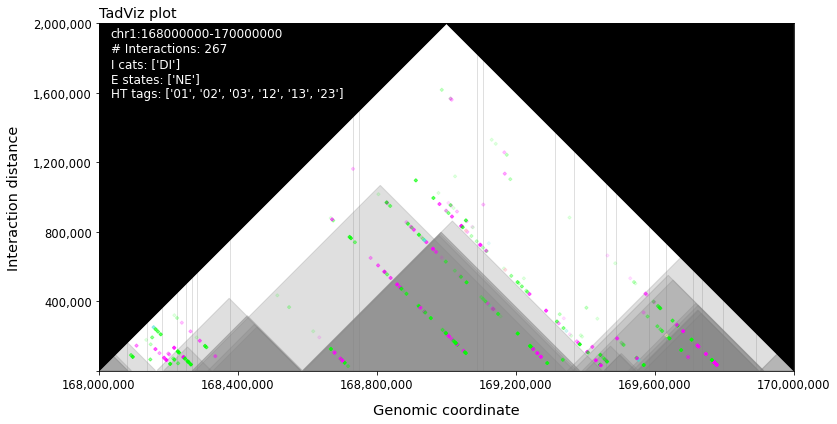

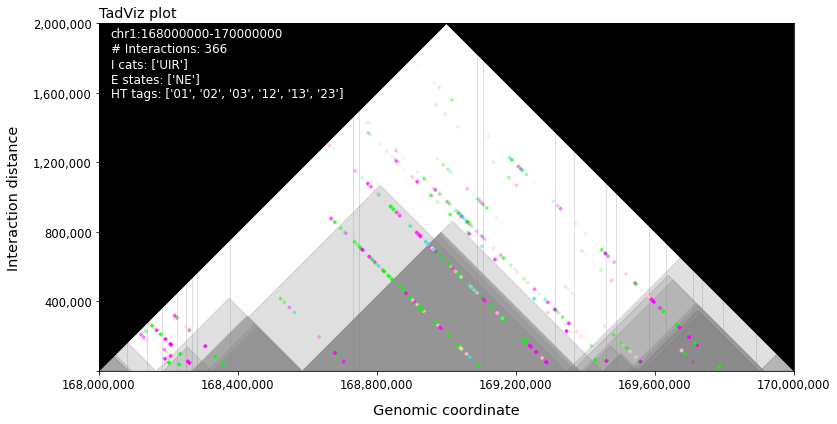

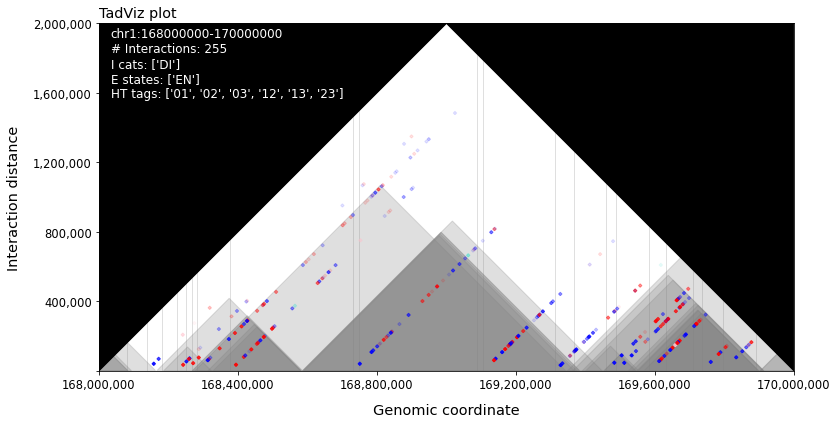

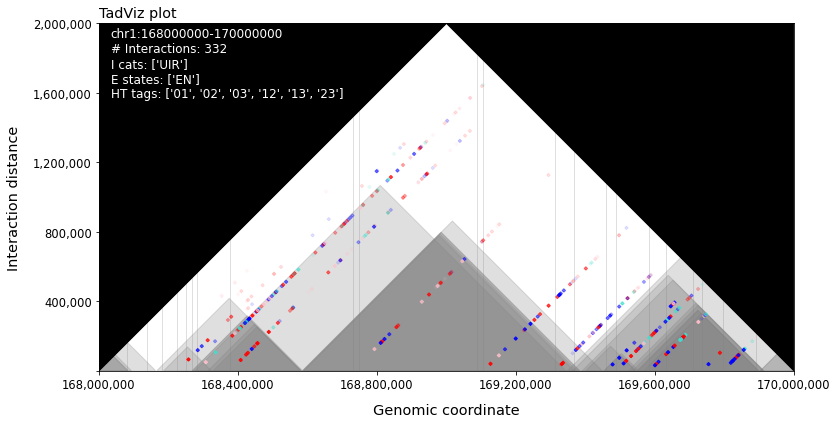

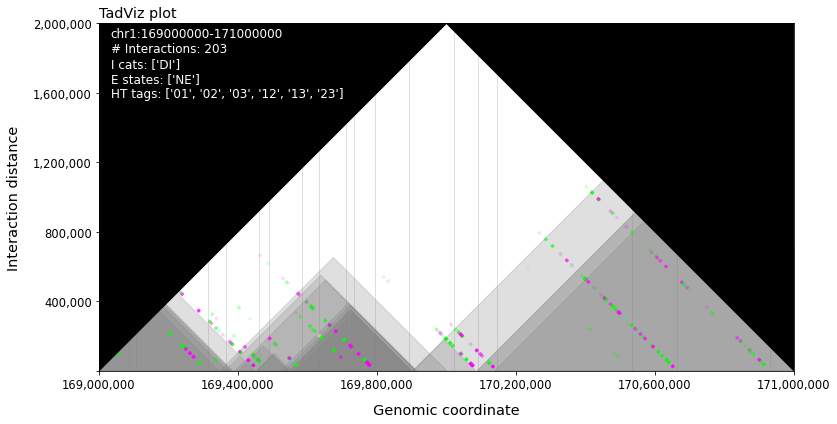

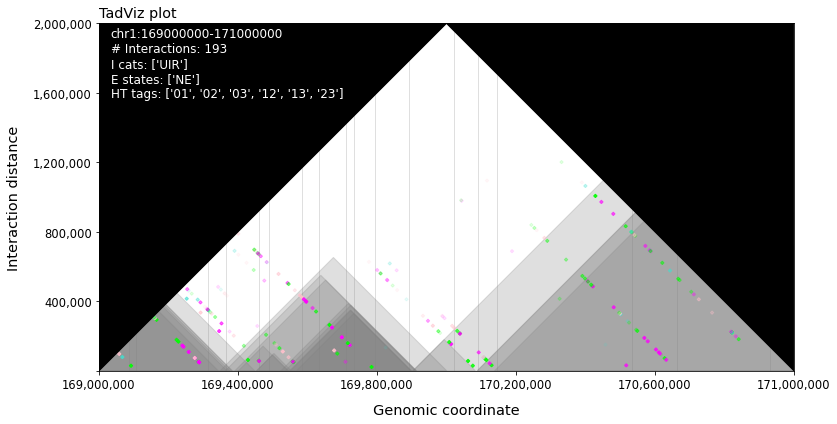

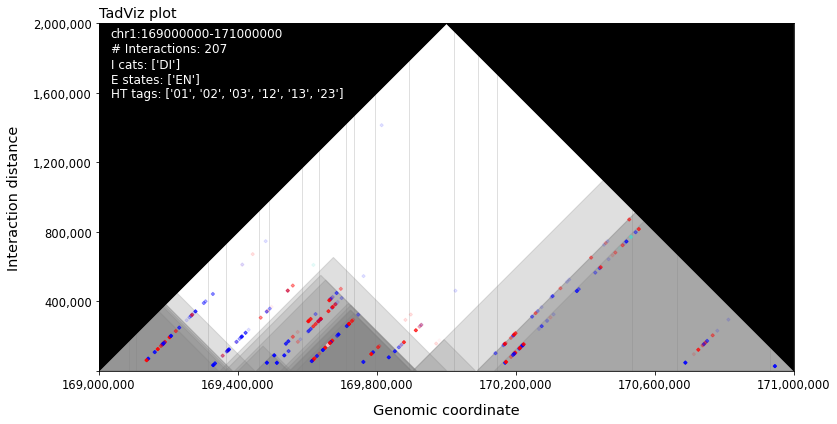

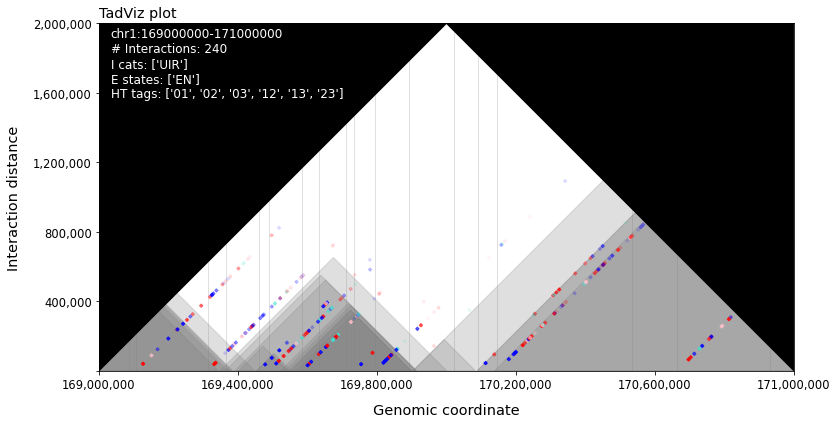

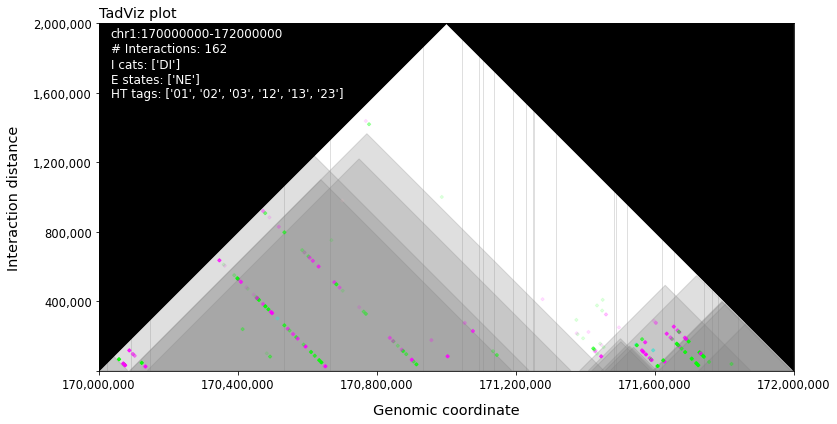

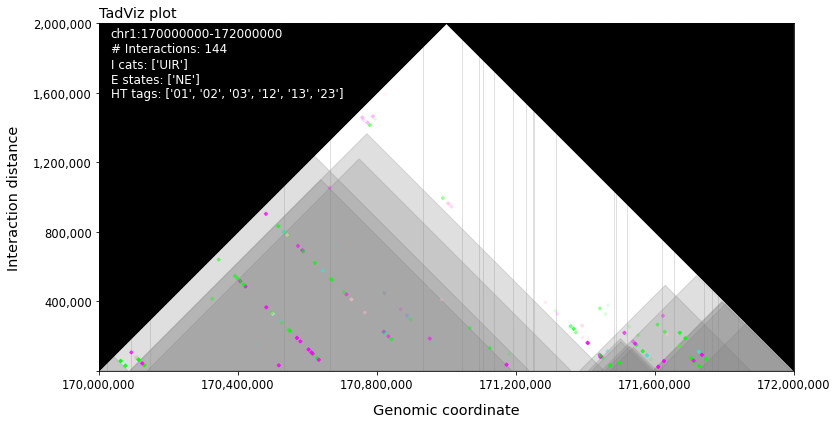

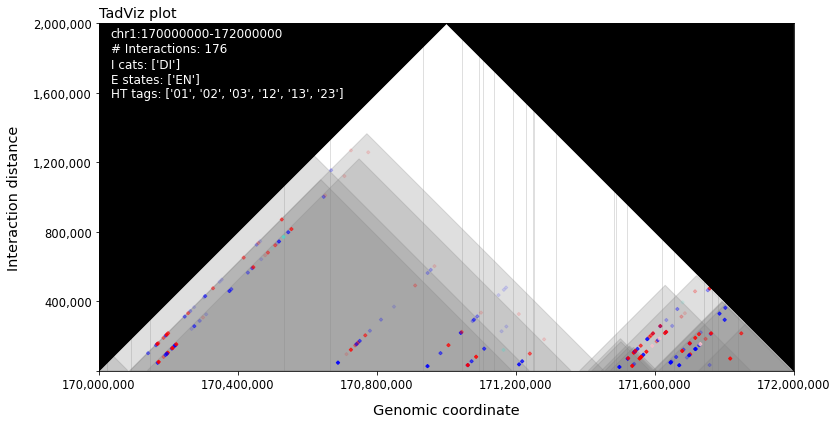

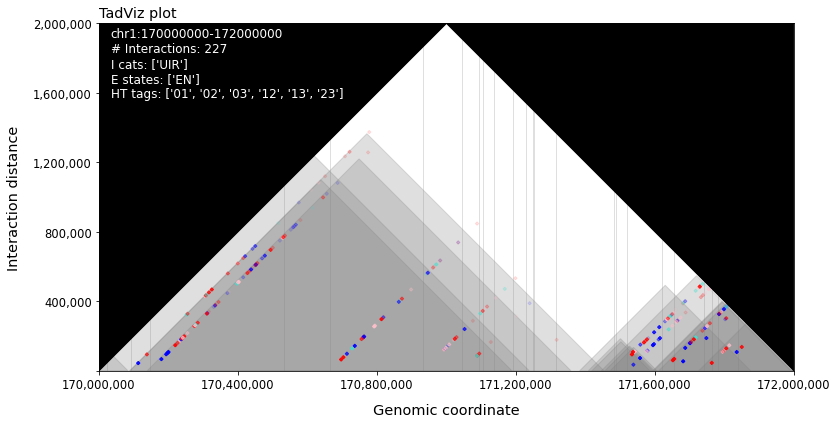

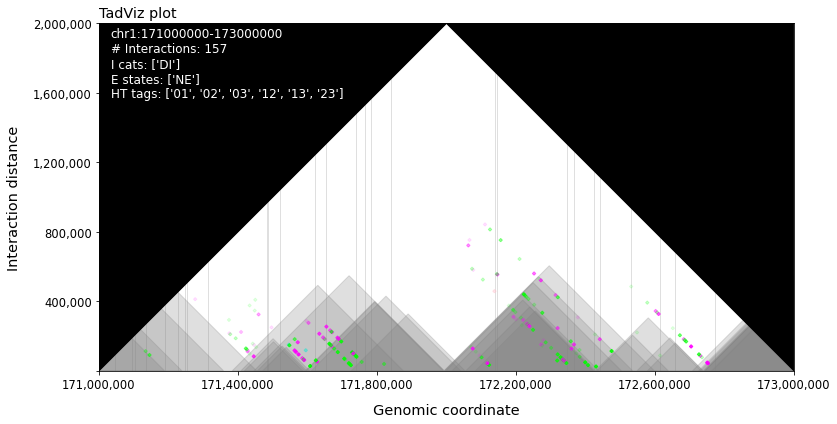

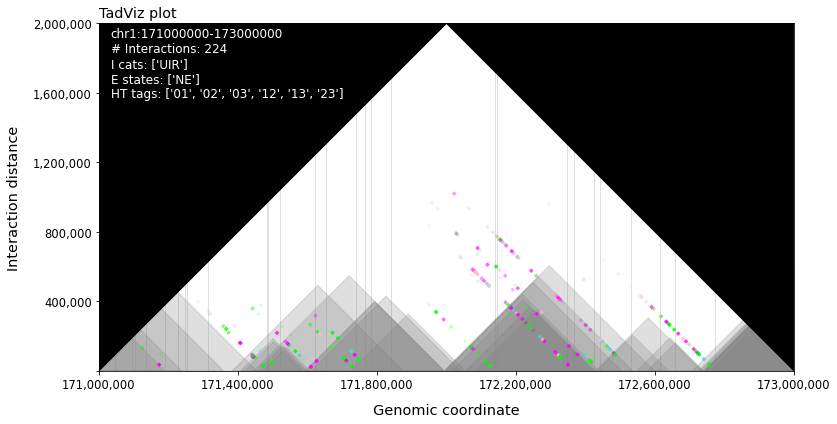

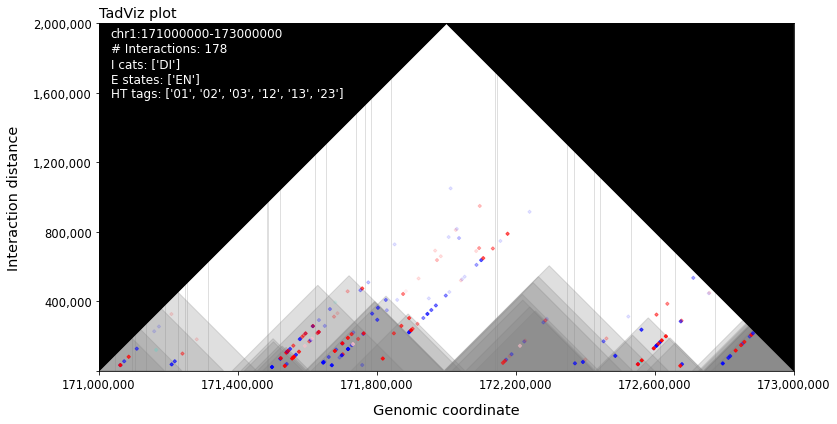

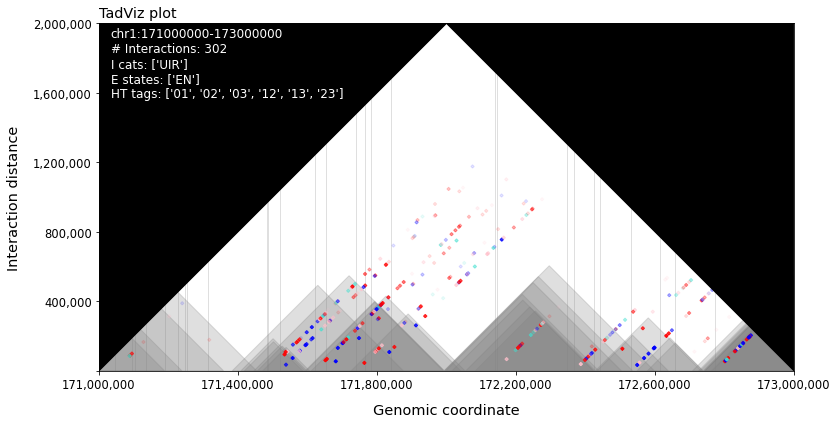

In [17]:
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    for e_cat in ['NE', 'EN']:
        print("\te_cat: " + e_cat)
        for i_cat in ['DI', 'UIR']:
            print("\t\ti_cat: " + i_cat)
            TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                            begin = begin,
                                            end = end,
                                            inter_cat_list = [i_cat],
                                            enr_cat_list = [e_cat],
                                            ht_tag_list = ['01', '02', '03', '12', '13', '23'],
                                            color_i_cats=False,
                                            d_radius = d_radius,
                                            verbose=False)

### Possible plots for publication

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 1,465 interactions in range:
		chr10:12500000-14500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			294
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 12.   16.   19.   24.   29.   33.   40.   52.   67.4 583. ]
[INFO] ... done.


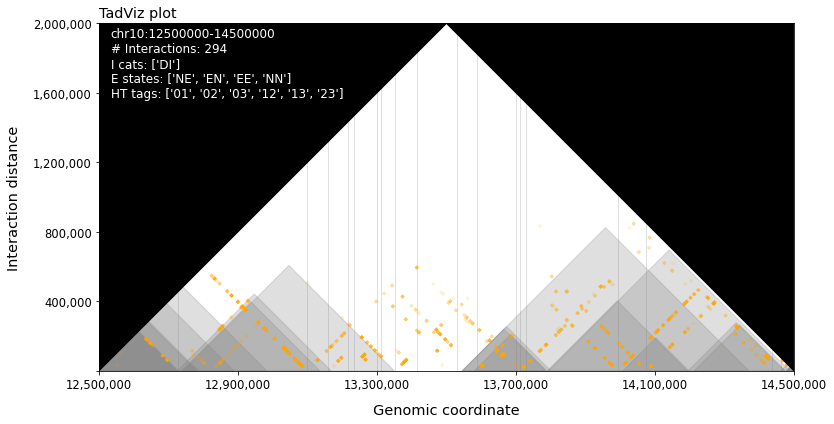

In [18]:
chrom = 'chr10'
begin = 12500000
end = begin + 2000000

TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI'],
                                d_radius = d_radius,
                                color_i_cats = True)